# Everymind - Turnover de Funcionários

**INTEGRANTES:**


1. Emanuele Lacerda Morais Martins
2. Giovanna Furlan Torres
3. Jean Lucas Rothstein Machado
4. Lucas de Britto Vieira
5. Patrick Victorino Miranda
6. Pedro Henrique Sant'Anna Oliveira




# 1. Introdução


**1. Problema a ser resolvido:**

Atualmente as empresas vêm sendo afetadas pela intensa rotatividade dos seus colaboradores. Esse problema atinge a companhia de diversas maneiras, como: 1) Os gastos contínuos com contratação; e 2) Treinamento e desenvolvimento de novos funcionários. Além disso, essa situação interfere em toda dinâmica do negócio, desde a produção, criação, desenvolvimento até a entrega final para os consumidores.

**2. Solução Proposta**

A solução se baseia em uma ferramenta, que utiliza o aprendizado de máquina para realizar a previsão da taxa de rotatividade dos funcionários. Esse modelo de predição irá fornecer a área de RH da Everymind quais colaboradores são mais propenso a saírem da empresa, contribuindo para que eles encontrem maneiras de reduzir a taxa de turnover e que melhorem a experiência dos seus colaboradores, através de um “Lock in”,  sendo esse uma forma de beneficiar os funcionários que apresentam características que condizem com a cultura da empresa, fornecendo incentivos de permanência na instituição.

A construção de um modelo preditivo para a alta taxa de turnover de funcionários para a empresa Everymind será realizada através do Google Colaboratory, por meio deste notebook. Nas sessões seguintes serão demonstradas passo a passo de como os dados foram utilizados até a conclusão e entrega do modelo esperado, passando pelas fases: 


1. Seleção dos dados;
2. Processamento dos dados selecionados;
3. Transformação dos dados (pré-processamento);
4. Teste do modelo; e
5. Interpretação e Avaliação do modelo;



## 1.1. Seleção dos dados

### 1.1.1. Importação das bibliotecas e plugins

1.   **Pandas:** Biblioteca que fornece ferramentas para análise e manipulação de dados;
2.   **Numpy:** Biblioteca utilizada através de funções que auxiliam na manipulação da computação numérica;
3. **Datetime e Date:** Bibliotecas que possibilitam a manipulação de datas e horas; 
4. **Moment:** Plugin para manusear o tempo em si, ou seja, o tempo exato que as condições e variáveis ocorrem ou estão ocorrendo; 
5. **matplotlib:** Biblioteca utilizada para visualização de dados e plotagem gráfica;
6. **seaborn:** Biblioteca que fornece ferramentas para plotagem estatística;





In [ ]:
#Importação de bibliotecas

import pandas as pd
import numpy as np
from datetime import date
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz 
import graphviz
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score, f1_score

#Importação de Plugins

!pip install moment
import moment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.1.2. Importação da base de dados

Para realizar a análise, padronização e manipulação dos dados é necessário selecionar a base de dados desejada. Neste documento a importação da mesma será feita através do Google Drive e o arquivo está em formato excel (xlsx).

In [ ]:
#Importação da Base de dados - Planilha Everymind
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_excel('/content/drive/Shareddrives/Everymind/Base Colaboradores Everymind.xlsx', sheet_name="Everymind")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importação da Base de dados - Planilha Reconhecimento
from google.colab import drive
drive.mount('/content/drive')
df1 = pd.read_excel('/content/drive/Shareddrives/Everymind/Base Colaboradores Everymind.xlsx', sheet_name="Reconhecimento")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importação da Base de dados - Planilha Ambiente de Trabalho
from google.colab import drive
drive.mount('/content/drive')
df2 = pd.read_excel('/content/drive/Shareddrives/Everymind/Base Colaboradores Everymind.xlsx', sheet_name="Ambiente de Trabalho 27.07")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A célula de código abaixo é responsável por realizar a leitura e apresentação dos dados carregados da base na etapa anterior.

*   df - Apresenta a aba da planilha Everymind
*   df1 - Apresenta a aba da planilha Reconhecimento
*   df2 - Apresenta a aba da planilha Ambiente de Trabalho 27.07

In [ ]:
df

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area
0,476.0,Pessoa Colaboradora 1,06/06/2022,NaT,NaN,Funcional Pl,2250.0,1985-02-06,Masculino,Branca,Casado,Superior incompleto,PR,Curitiba,CPG & Retail I
1,373.0,Pessoa Colaboradora 10,14/02/2022,NaT,NaN,Funcional Jr,1600.0,1998-11-11,Feminino,Parda,Solteiro,Superior incompleto,PB,João Pessoa,Core & Industrias II
2,392.0,Pessoa Colaboradora 100,02/03/2022,NaT,NaN,Marketing PL,4000.0,1988-11-21,Feminino,Branca,Solteiro,Superior incompleto,SP,São Paulo,Agencia Digital
3,110.0,Pessoa Colaboradora 101,02/12/2019,NaT,NaN,Funcional Sr,4957.2,1983-07-30,Masculino,Preta,Divorciado,Graduação,SP,São Paulo,Core & Industrias I
4,319.0,Pessoa Colaboradora 102,04/10/2021,NaT,NaN,Gerente Vendas III,8715.9,1983-01-27,Masculino,Branca,Solteiro,Pós Graduação,SP,São Paulo,Vendas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,503.0,Pessoa Colaboradora 95,04/07/2022,NaT,NaN,Trainee - Dev,1017.0,2003-04-02,Masculino,Branca,Solteiro,Superior incompleto,SP,São Paulo,Agencia Digital
471,409.0,Pessoa Colaboradora 96,16/03/2022,NaT,NaN,Trainee - Dev,1017.0,1994-01-10,Masculino,Branca,Solteiro,Superior incompleto,SP,São Paulo,CPG & Retail II
472,504.0,Pessoa Colaboradora 97,04/07/2022,NaT,NaN,Trainee - Dev,1017.0,1991-09-28,Masculino,Branca,Solteiro,Superior incompleto,SP,Praia Grande,CPG & Retail
473,151.0,Pessoa Colaboradora 98,13/04/2020,NaT,NaN,Dev Sr,4681.8,1990-03-12,Masculino,Amarela,Casado,Pós Graduação,SP,Bragança Paulista,CPG & Retail I


In [ ]:
df1

,Matricula,Codinome,Situação,Data de Admissão,Data Vigência,Alterou Função,Motivo,Novo Salario,Novo Cargo
0,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2021-11-01,Sim,PROMOÇÃO,9000.000,Gerente Sr
1,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2021-08-01,Não,MÉRITO,7000.000,Arquiteto
2,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2020-11-01,Não,MÉRITO,6000.000,Arquiteto
3,2.0,Pessoa Colaboradora 247,Ativo,2015-02-02,2020-07-01,Sim,PROMOÇÃO,5200.000,Arquiteto
4,3.0,Pessoa Colaboradora 92,Ativo,2015-03-26,2022-02-01,Sim,PROMOÇÃO,8250.000,Gerente Sr
...,...,...,...,...,...,...,...,...,...
334,447.0,Pessoa Colaboradora 274,Ativo,2020-12-23,2021-11-01,Sim,PROMOÇÃO,1616.210,Dev Jr
335,448.0,Pessoa Colaboradora 279,Ativo,2021-05-26,2022-04-01,Não,MÉRITO,3491.660,Funcional Pl
336,448.0,Pessoa Colaboradora 279,Ativo,2021-05-26,2022-02-01,Não,MÉRITO,3371.370,Dev Pl
337,460.0,Pessoa Colaboradora 267,Ativo,2020-12-23,2022-05-01,Não,MÉRITO,1716.480,Dev Jr


In [ ]:
df2

,Divisao,Pilar,Pontuação,Fator,Pontuação.1,Pergunta,Pulou,Muito Insatisfeito,Insatisfeito,Neutro,Satisfeito,Muito Satisfeito,Taxa de Confiabilidade
0,Everymind,Relacionamento com o gestor,"9,05",Colaboração com o gestor,"8,81",Como é trabalhar com seu gestor direto?,1.69%,NaN,NaN,3.39%,16.95%,77.97%,Baixo
1,Everymind,Relacionamento com o gestor,"9,05",Colaboração com o gestor,"8,81","Quando você pede ajuda ao seu gestor direto, e...",1.18%,NaN,1.18%,3.53%,27.06%,67.06%,Baixo
2,Everymind,Relacionamento com o gestor,"9,05",Colaboração com o gestor,"8,81",Meu gestor direto ouve e é empático com a minh...,3.13%,NaN,NaN,7.29%,27.08%,62.5%,Baixo
3,Everymind,Relacionamento com o gestor,"9,05",Colaboração com o gestor,"8,81",O seu gestor direto participa ativamente de fo...,1.04%,1.04%,1.04%,7.29%,40.63%,48.96%,Baixo
4,Everymind,Relacionamento com o gestor,"9,05",Confiança no gestor,"9,44",Meu gestor direto é alguém em quem posso confiar.,NaN,NaN,NaN,33.33%,16.67%,50%,Muito Baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,Vendas,Feedback,"8,62",Qualidade,"8,12",Existe abertura para dar e receber feedbacks c...,NaN,NaN,NaN,NaN,NaN,100%,Muito Baixo
1690,Vendas,Feedback,"8,62",Frequência,9,A frequência dos feedbacks que recebo é sufici...,NaN,NaN,NaN,NaN,NaN,100%,Baixo
1691,Vendas,Feedback,"8,62",Frequência,9,Estou satisfeito com a frequência do feedback ...,NaN,NaN,NaN,NaN,NaN,NaN,Muito Baixo
1692,Vendas,Feedback,"8,62",Frequência,9,Você está satisfeito com a frequência de feedb...,NaN,NaN,NaN,NaN,66.67%,33.33%,Baixo


## 1.2. Visualização dos tipos das colunas







As colunas apresentadas em ambas as tabelas disponibilizadas possuem tipos diferentes de formatação, sendo divididos em: 

1. **float** : Responsável por armazenar números reais com precisão de 6 casas decimais; 
2. **object** : Responsável por armazenar qualquer tipo de dado genêrico, utilizado para representar características abstratas;
3. **datetime** : Responsável pelo armazenamento de datas e horas;

Os códigos abaixos apresentam os tipos encontrados nas planilhas, respectivamente:


1. Everymind
2. Reconhecimento; 
3. Ambiente de Trabalho;

In [ ]:
df.dtypes

Matrícula               float64
Nome Completo            object
Dt Admissao              object
Dt Saida         datetime64[ns]
Tipo Saida               object
Cargo                    object
Salario Mês             float64
Dt Nascimento    datetime64[ns]
Genero                   object
Etnia                    object
Estado Civil             object
Escolaridade             object
Estado                   object
Cidade                   object
Area                     object
dtype: object

In [ ]:
df1.dtypes

Matricula                  float64
Codinome                    object
Situação                    object
Data de Admissão    datetime64[ns]
Data Vigência       datetime64[ns]
Alterou Função              object
Motivo                      object
Novo Salario               float64
Novo Cargo                  object
dtype: object

In [ ]:
df2.dtypes

Divisao                   object
Pilar                     object
Pontuação                 object
Fator                     object
Pontuação.1               object
Pergunta                  object
Pulou                     object
Muito Insatisfeito        object
Insatisfeito              object
Neutro                    object
Satisfeito                object
Muito Satisfeito          object
Taxa de Confiabilidade    object
dtype: object

# 2. Processamento e Transformação dos dados selecionados

## 2.1. Exclusão de espaços em branco 

Algumas colunas apresentavam espaços em branco, o que dificulta a manipulação durante o pré-processamento e manipulação dos dados. Sendo asism, o método replace() foi utilizado para substituir uma eventualidade encontrada em uma das strings da base de dados. 

1. Abaixo apresenta-se as colunas da planilha "Everymind" que foram necessárias retirar os espaços em branco;

In [ ]:
#Atribuição de todas as colunas que possuem o tipo objeto a variável criada
espaco_nulo_everymind = df.select_dtypes(include = 'object').columns 

#O comando é responsável por percorrer todas as linhas das colunas selecionadas e fazer a alteração de onde possui espaço em branco inserir nenhum espaço
for i in espaco_nulo_everymind:
  df[i] = df[i].str.replace(' ','')

In [ ]:
df

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area
0,476.0,PessoaColaboradora1,06/06/2022,NaT,NaN,FuncionalPl,2250.0,1985-02-06,Masculino,Branca,Casado,Superiorincompleto,PR,Curitiba,CPG&RetailI
1,373.0,PessoaColaboradora10,14/02/2022,NaT,NaN,FuncionalJr,1600.0,1998-11-11,Feminino,Parda,Solteiro,Superiorincompleto,PB,JoãoPessoa,Core&IndustriasII
2,392.0,PessoaColaboradora100,02/03/2022,NaT,NaN,MarketingPL,4000.0,1988-11-21,Feminino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital
3,110.0,PessoaColaboradora101,02/12/2019,NaT,NaN,FuncionalSr,4957.2,1983-07-30,Masculino,Preta,Divorciado,Graduação,SP,SãoPaulo,Core&IndustriasI
4,319.0,PessoaColaboradora102,04/10/2021,NaT,NaN,GerenteVendasIII,8715.9,1983-01-27,Masculino,Branca,Solteiro,PósGraduação,SP,SãoPaulo,Vendas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,503.0,PessoaColaboradora95,04/07/2022,NaT,NaN,Trainee-Dev,1017.0,2003-04-02,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital
471,409.0,PessoaColaboradora96,16/03/2022,NaT,NaN,Trainee-Dev,1017.0,1994-01-10,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,CPG&RetailII
472,504.0,PessoaColaboradora97,04/07/2022,NaT,NaN,Trainee-Dev,1017.0,1991-09-28,Masculino,Branca,Solteiro,Superiorincompleto,SP,PraiaGrande,CPG&Retail
473,151.0,PessoaColaboradora98,13/04/2020,NaT,NaN,DevSr,4681.8,1990-03-12,Masculino,Amarela,Casado,PósGraduação,SP,BragançaPaulista,CPG&RetailI


2. Abaixo apresenta-se as colunas da planilha "Reconhecimento" que foram necessárias retirar os espaços em branco;

In [ ]:
#Atribuição de todas as colunas que possuem o tipo objeto a variável criada
espaco_nulo_reconhecimento = df1.select_dtypes(include = 'object').columns 

#O comando é responsável por percorrer todas as linhas das colunas selecionadas e fazer a alteração de onde possui espaço em branco inserir nenhum espaço
for i in espaco_nulo_reconhecimento:
  df1[i] = df1[i].str.replace(' ','')

In [ ]:
df1

,Matricula,Codinome,Situação,Data de Admissão,Data Vigência,Alterou Função,Motivo,Novo Salario,Novo Cargo
0,2.0,PessoaColaboradora247,Ativo,2015-02-02,2021-11-01,Sim,PROMOÇÃO,9000.000,GerenteSr
1,2.0,PessoaColaboradora247,Ativo,2015-02-02,2021-08-01,Não,MÉRITO,7000.000,Arquiteto
2,2.0,PessoaColaboradora247,Ativo,2015-02-02,2020-11-01,Não,MÉRITO,6000.000,Arquiteto
3,2.0,PessoaColaboradora247,Ativo,2015-02-02,2020-07-01,Sim,PROMOÇÃO,5200.000,Arquiteto
4,3.0,PessoaColaboradora92,Ativo,2015-03-26,2022-02-01,Sim,PROMOÇÃO,8250.000,GerenteSr
...,...,...,...,...,...,...,...,...,...
334,447.0,PessoaColaboradora274,Ativo,2020-12-23,2021-11-01,Sim,PROMOÇÃO,1616.210,DevJr
335,448.0,PessoaColaboradora279,Ativo,2021-05-26,2022-04-01,Não,MÉRITO,3491.660,FuncionalPl
336,448.0,PessoaColaboradora279,Ativo,2021-05-26,2022-02-01,Não,MÉRITO,3371.370,DevPl
337,460.0,PessoaColaboradora267,Ativo,2020-12-23,2022-05-01,Não,MÉRITO,1716.480,DevJr


3. Abaixo apresenta-se as colunas da planilha "Ambiente de Trabalho 27.07" que foram necessárias retirar os espaços em branco;

In [ ]:
#Atribuição de todas as colunas que possuem o tipo objeto a variável criada
espaco_nulo_ambiente = df2.select_dtypes(include = 'object').columns 

#O comando é responsável por percorrer todas as linhas das colunas selecionadas e fazer a alteração de onde possui espaço em branco inserir nenhum espaço
for i in espaco_nulo_ambiente:
  df2[i] = df2[i].str.replace(' ','')

In [ ]:
df2

,Divisao,Pilar,Pontuação,Fator,Pontuação.1,Pergunta,Pulou,Muito Insatisfeito,Insatisfeito,Neutro,Satisfeito,Muito Satisfeito,Taxa de Confiabilidade
0,Everymind,Relacionamentocomogestor,"9,05",Colaboraçãocomogestor,"8,81",Comoétrabalharcomseugestordireto?,1.69%,NaN,NaN,3.39%,16.95%,77.97%,Baixo
1,Everymind,Relacionamentocomogestor,"9,05",Colaboraçãocomogestor,"8,81","Quandovocêpedeajudaaoseugestordireto,elededica...",1.18%,NaN,1.18%,3.53%,27.06%,67.06%,Baixo
2,Everymind,Relacionamentocomogestor,"9,05",Colaboraçãocomogestor,"8,81",Meugestordiretoouveeéempáticocomaminhaopinião.,3.13%,NaN,NaN,7.29%,27.08%,62.5%,Baixo
3,Everymind,Relacionamentocomogestor,"9,05",Colaboraçãocomogestor,"8,81",Oseugestordiretoparticipaativamentedeformacola...,1.04%,1.04%,1.04%,7.29%,40.63%,48.96%,Baixo
4,Everymind,Relacionamentocomogestor,"9,05",Confiançanogestor,"9,44",Meugestordiretoéalguémemquempossoconfiar.,NaN,NaN,NaN,33.33%,16.67%,50%,MuitoBaixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689,Vendas,Feedback,"8,62",Qualidade,"8,12",Existeaberturaparadarereceberfeedbacksconstrut...,NaN,NaN,NaN,NaN,NaN,100%,MuitoBaixo
1690,Vendas,Feedback,"8,62",Frequência,9,Afrequênciadosfeedbacksquereceboésuficientepar...,NaN,NaN,NaN,NaN,NaN,100%,Baixo
1691,Vendas,Feedback,"8,62",Frequência,9,Estousatisfeitocomafrequênciadofeedbackdadopor...,NaN,NaN,NaN,NaN,NaN,NaN,MuitoBaixo
1692,Vendas,Feedback,"8,62",Frequência,9,Vocêestásatisfeitocomafrequênciadefeedbackprov...,NaN,NaN,NaN,NaN,66.67%,33.33%,Baixo


## 2.2. Adição de valores nos espaços sem informações

Algumas colunas apresentavam valores faltantes, resultando em uma qualidade de dados de difícil análise. Ao contemplar o tipo de saída esperada, calculou-se as entradas prováveis das variáveis a serem manipuladas.


1.   Coluna "Tipo Saída" - Planilha Everymind

Os dados comtemplados na coluna, são responsáveis por exibir qual tipo de saída o funcionário teve ao deixar a empresa. Nos campos em branco, foi inserido a palavra "Ativo", pois quer dizer que aquele funcionário ainda trabalha na empresa. 

In [ ]:
#O comando é responsável por atribuir a coluna selecionada o valor "Ativo", somente nos campos vazios
df['Tipo Saida'] = df['Tipo Saida'].replace(np.NaN,'Ativo')

2. Coluna "Dt Saída" - Planilha Everymind

Os dados comtemplados na coluna, são responsáveis por exibir a data de saída do funcionário da empresa. Nos campos em branco, foi inserido a data atual (dia em que estamos), pois quer dizer que aquele funcionário ainda trabalha na empresa.

In [ ]:
#O comando é responsável por atribuir a coluna selecionada o valor da data atual, somente nos campos vazios
df['Dt Saida'] = df['Dt Saida'].replace(np.NaN, date.today()) 

3. Coluna "Pulou" - Planilha Ambiente de Trabalho

Os dados contemplados na coluna "Pulou", são responsáveis por exibir a quantidade de funcionarios que pularam a pergunta feita à eles. Nos campos em branco, foi inserido o numero 0 (devido ao fato que ninguem pulou a pergunta), assim deixando todos os dados do mesmo padrão.



*   **Observação:** O comando "isnull()" apresentado abaixo é utilizado para verificar quais linhas da coluna selecionada estão em branco.



In [ ]:
#Definindo uma variável que recebe todos os valores nulos da coluna "Pulou"
pulou_valores_nulos = df2['Pulou'].isnull()

#Definindo uma variável que recebe todos os valores presentes na coluna "Pulou"
pulou_valores = df2['Pulou']

#O for percorre as linhas de zero até a quantidade de linhas presente na variável "pulou_valores_nulos"
for i in range(0,len(pulou_valores_nulos)):

  #Se a linha de df2 que estiver sendo analisada for nula
  if pulou_valores_nulos[i] == True:
    #Adiciona o valor zero a linha selecionada
    pulou_valores_nulos[i] = "0"

  # #Se a linha de df2 que estiver sendo analisada não for nula 
  if pulou_valores_nulos[i] == False: 
    #Permanece o valor que já estava na linha 
    pulou_valores_nulos[i] = (pulou_valores[i])

O comando abaixo ilustra como a tabela "Ambiente de trabalho" ficou após a inclusão do número 0 (zero) nos espaços em branco.

In [ ]:
pulou_valores_nulos

0       1.69%
1       1.18%
2       3.13%
3       1.04%
4           0
        ...  
1689        0
1690        0
1691        0
1692        0
1693        0
Name: Pulou, Length: 1694, dtype: object

Os dados contemplados na coluna "Muito Insatisfeito" são responsáveis por exibir a quantidade de funcionarios que estavam muito insatisfeitos com a questão levantada na pergunta feita à eles. Nos campos em branco, foi inserido o numero 0 (devido ao fato que a pergunta não foi respondida), assim deixando todos os dados do mesmo padrão.

In [ ]:
#Definindo uma variável que recebe todos os valores nulos da coluna "Muito Insatisfeito"
Minsatisfeito_valores_nulos = df2['Muito Insatisfeito'].isnull()

#Definindo uma variável que recebe todos os valores presentes na coluna "Muito Insatisfeito"
Minsatisfeito_valores = df2['Muito Insatisfeito']

#O for percorre as linhas de zero até a quantidade de linhas presente na variável "Minsatisfeito_valores_nulos"
for i in range(0,len(Minsatisfeito_valores_nulos)):

  #Se a linha de df2 que estiver sendo analisada for nula
  if Minsatisfeito_valores_nulos[i] == True:
    #Adiciona o valor zero a linha selecionada
    Minsatisfeito_valores_nulos[i] = "0"

  # #Se a linha de df2 que estiver sendo analisada não for nula 
  if Minsatisfeito_valores_nulos[i] == False: 
    #Permanece o valor que já estava na linha 
    Minsatisfeito_valores_nulos[i] = (Minsatisfeito_valores[i])

O comando abaixo ilustra como a tabela "Ambiente de trabalho" ficou após a inclusão do número 0 (zero) nos espaços em branco.

In [ ]:
Minsatisfeito_valores_nulos

0           0
1           0
2           0
3       1.04%
4           0
        ...  
1689        0
1690        0
1691        0
1692        0
1693        0
Name: Muito Insatisfeito, Length: 1694, dtype: object

Os dados contemplados na coluna "Insatisfeito" são responsáveis por exibir a quantidade de funcionarios que estavam insatisfeitos com a questão levantada na pergunta feita à eles. Nos campos em branco, foi inserido o numero 0 (devido ao fato que a pergunta não foi respondida), assim deixando todos os dados do mesmo padrão.

In [ ]:
#Definindo uma variável que recebe todos os valores nulos da coluna "Insatisfeito"
insatisfeito_valores_nulos = df2['Insatisfeito'].isnull()

#Definindo uma variável que recebe todos os valores presentes na coluna "Insatisfeito"
insatisfeito_valores = df2['Insatisfeito']

#O for percorre as linhas de zero até a quantidade de linhas presente na variável "insatisfeito_valores_nulos"
for i in range(0,len(insatisfeito_valores_nulos)):

  #Se a linha de df2 que estiver sendo analisada for nula
  if insatisfeito_valores_nulos[i] == True:
    #Adiciona o valor zero a linha selecionada
    insatisfeito_valores_nulos[i] = "0"

  # #Se a linha de df2 que estiver sendo analisada não for nula 
  if insatisfeito_valores_nulos[i] == False: 
    #Permanece o valor que já estava na linha 
    insatisfeito_valores_nulos[i] = (insatisfeito_valores[i])

O comando abaixo ilustra como a tabela "Ambiente de trabalho" ficou após a inclusão do número 0 (zero) nos espaços em branco.

In [ ]:
insatisfeito_valores_nulos

0           0
1       1.18%
2           0
3       1.04%
4           0
        ...  
1689        0
1690        0
1691        0
1692        0
1693        0
Name: Insatisfeito, Length: 1694, dtype: object

Os dados contemplados na coluna "Neutro" são responsáveis por exibir a quantidade de funcionarios que estavam neutros com a questão levantada na pergunta feita à eles. Nos campos em branco, foi inserido o numero 0 (devido ao fato que a pergunta não foi respondida), assim deixando todos os dados do mesmo padrão.

In [ ]:
#Definindo uma variável que recebe todos os valores nulos da coluna "Neutro"
neutro_valores_nulos = df2['Neutro'].isnull()

#Definindo uma variável que recebe todos os valores presentes na coluna "Neutro"
neutro_valores = df2['Neutro']

#O for percorre as linhas de zero até a quantidade de linhas presente na variável "neutro_valores_nulos"
for i in range(0,len(neutro_valores_nulos)):

  #Se a linha de df2 que estiver sendo analisada for nula
  if neutro_valores_nulos[i] == True:
    #Adiciona o valor zero a linha selecionada
    neutro_valores_nulos[i] = "0"

  # #Se a linha de df2 que estiver sendo analisada não for nula 
  if neutro_valores_nulos[i] == False: 
    #Permanece o valor que já estava na linha 
    neutro_valores_nulos[i] = (neutro_valores[i])

O comando abaixo ilustra como a tabela "Ambiente de trabalho" ficou após a inclusão do número 0 (zero) nos espaços em branco.

In [ ]:
neutro_valores_nulos

0        3.39%
1        3.53%
2        7.29%
3        7.29%
4       33.33%
         ...  
1689         0
1690         0
1691         0
1692         0
1693         0
Name: Neutro, Length: 1694, dtype: object

Os dados contemplados na coluna "Satisfeito" são responsáveis por exibir a quantidade de funcionarios que estavam satisfeitos com a questão levantada na pergunta feita à eles. Nos campos em branco, foi inserido o numero 0 (devido ao fato que a pergunta não foi respondida), assim deixando todos os dados do mesmo padrão.

In [ ]:
#Definindo uma variável que recebe todos os valores nulos da coluna "Satisfeito"
satisfeito_valores_nulos = df2['Satisfeito'].isnull()

#Definindo uma variável que recebe todos os valores presentes na coluna "Satisfeito"
satisfeito_valores = df2['Satisfeito']

#O for percorre as linhas de zero até a quantidade de linhas presente na variável "neutro_valores_nulos"
for i in range(0,len(satisfeito_valores_nulos)):

  #Se a linha de df2 que estiver sendo analisada for nula
  if satisfeito_valores_nulos[i] == True:
    #Adiciona o valor zero a linha selecionada
    satisfeito_valores_nulos[i] = "0"

  # #Se a linha de df2 que estiver sendo analisada não for nula 
  if satisfeito_valores_nulos[i] == False: 
    #Permanece o valor que já estava na linha 
    satisfeito_valores_nulos[i] = (satisfeito_valores[i])

O comando abaixo ilustra como a tabela "Ambiente de trabalho" ficou após a inclusão do número 0 (zero) nos espaços em branco.

In [ ]:
satisfeito_valores_nulos

0       16.95%
1       27.06%
2       27.08%
3       40.63%
4       16.67%
         ...  
1689         0
1690         0
1691         0
1692    66.67%
1693    33.33%
Name: Satisfeito, Length: 1694, dtype: object

Os dados contemplados na coluna "Muito Satisfeito" são responsáveis por exibir a quantidade de funcionarios que estavam muito satisfeitos com a questão levantada na pergunta feita à eles. Nos campos em branco, foi inserido o numero 0 (devido ao fato que a pergunta não foi respondida), assim deixando todos os dados do mesmo padrão.

In [ ]:
#Definindo uma variável que recebe todos os valores nulos da coluna "Muito Satisfeito"
Msatisfeito_valores_nulos = df2['Muito Satisfeito'].isnull()

#Definindo uma variável que recebe todos os valores presentes na coluna "Muito Satisfeito"
Msatisfeito_valores = df2['Muito Satisfeito']

#O for percorre as linhas de zero até a quantidade de linhas presente na variável "Mneutro_valores_nulos"
for i in range(0,len(Msatisfeito_valores_nulos)):

  #Se a linha de df2 que estiver sendo analisada for nula
  if Msatisfeito_valores_nulos[i] == True:
    #Adiciona o valor zero a linha selecionada
    Msatisfeito_valores_nulos[i] = "0"

  # #Se a linha de df2 que estiver sendo analisada não for nula 
  if Msatisfeito_valores_nulos[i] == False: 
    #Permanece o valor que já estava na linha 
    Msatisfeito_valores_nulos[i] = (Msatisfeito_valores[i])

O comando abaixo ilustra como a tabela "Ambiente de trabalho" ficou após a inclusão do número 0 (zero) nos espaços em branco.

In [ ]:
Msatisfeito_valores_nulos

0       77.97%
1       67.06%
2        62.5%
3       48.96%
4          50%
         ...  
1689      100%
1690      100%
1691         0
1692    33.33%
1693    66.67%
Name: Muito Satisfeito, Length: 1694, dtype: object

## 2.3. Formatação de datas

Para a manipulação correta das datas e horários na base de dados, todas precisam estar no mesmo formato. Para isso, realisou-se uma padronização através da utilização do comando replace, já explicado anteriormente.

In [ ]:
#O for percorre as linhas de 0 até a quantidade de linhas presente na coluna "Dt Admissao"
for i in range(0, len(df['Dt Admissao'])):
  #Passa por cada linha das colunas selecionadas e troca a formatação do conteúdo que está lá pelo formato indicado
  #remoção das horas das datas
  df['Dt Admissao'][i] = str(df['Dt Admissao'][i]).replace('00:00:00', '')
  df['Dt Saida'][i] = str(df['Dt Saida'][i]).replace('00:00:00', '')
  #troca de todas as '/' por '-'
  df['Dt Admissao'][i] = str(df['Dt Admissao'][i]).replace('/', '-')
  df['Dt Saida'][i] = str(df['Dt Saida'][i]).replace('/', '-')
  #Padronização de todos os dados para o formato (ano, mês, dia)
  df['Dt Admissao'][i] = moment.date(df['Dt Admissao'][i]).format("YYYY-MM-DD")
  df['Dt Saida'][i] = moment.date(df['Dt Saida'][i]).format("YYYY-MM-DD")
df['Dt Admissao'] = pd.to_datetime(df['Dt Admissao'], format="%Y/%m/%d")
df['Dt Saida'] = pd.to_datetime(df['Dt Saida'], format="%Y/%m/%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is try

O código abaixo mostra como a tabela ficou construída após as padronizações. Para visualizar o resultado, altere o nome da coluna, sendo possível os seguintes nomes:


*   Dt Admissao
*   Dt Saida



In [ ]:
display(df['Dt Admissao'])

0     2022-06-06
1     2022-02-14
2     2022-02-03
3     2019-02-12
4     2021-04-10
         ...    
470   2022-04-07
471   2022-03-16
472   2022-04-07
473   2020-04-13
474   2022-02-14
Name: Dt Admissao, Length: 475, dtype: datetime64[ns]

## 2.4. Manipulação das idades

Para manipular as idades, foi necessário criar um novo atributo chamado "Idade", pois na base de dados original foi entregue somente a data de nascimento do colaborador. Abaixo é exibido como foi construído a nova coluna.

In [ ]:
#Criação de um novo atributo chamado "Idade"
df['Idade'] = 0 

Para atribuir o valor da idade à nova coluna criada acima, foi feito um cálculo com base na diferença entre a coluna 'Dt Nascimento' e a data de hoje, fornecida pelo metodo date.today(), para os funcionarios ativos, e na diferença entre a coluna 'Dt Nascimento' e a 'Dt Saida' para os inativos.



> O metodo date.today() fornece o valor da data no momento atual, contida no sistema do computador.



In [ ]:
#o comando for passa por todas as linhas da tabela
for i in range(0, len(df['Dt Nascimento'])):
  #se na coluna Tipo saída o colaborador está ativo o comando continua
  if df['Tipo Saida'][i] == str('Ativo'):
    #se o colaborador ja fez aniverario durante o ano
    if date.today().month>(df['Dt Nascimento'][i]).month or date.today().month==(df['Dt Nascimento'][i]).month and date.today().day>=(df['Dt Nascimento'][i]).day:
      # A idade é igual a data de agora - data de nascimento do colaborador
      df['Idade'][i] = date.today().year - (df['Dt Nascimento'][i]).year
    #se o colaborador não fez aniverario no ano
    else:
      # A idade é a (data de agora - data de nascimento do colaborador) -1 ano
      df['Idade'][i] = (date.today().year - (df['Dt Nascimento'][i]).year)-1
  #se o colaborador não está mais ativo na empresa
  else:
    #se o colaborador ja fez aniverario no ano
    if df['Dt Saida'][i].month>=(df['Dt Nascimento'][i]).month:
      # A idade é a data de saída  - data de nascimento do colaborador
      df['Idade'][i] = df['Dt Saida'][i].year - (df['Dt Nascimento'][i]).year
    #se o colaborador não fez aniverario no ano
    else:
      # A idade é  a (data de saída  - data de nascimento do colaborador) - 1 ano
      df['Idade'][i] = (df['Dt Saida'][i].year - df['Dt Nascimento'][i].year)-1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarnin

O comando abaixo exibe a stituação da tabela, após as modificações feitas acima.

In [ ]:
df

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade
0,476.0,PessoaColaboradora1,2022-06-06,2022-09-23,Ativo,FuncionalPl,2250.0,1985-02-06,Masculino,Branca,Casado,Superiorincompleto,PR,Curitiba,CPG&RetailI,37
1,373.0,PessoaColaboradora10,2022-02-14,2022-09-23,Ativo,FuncionalJr,1600.0,1998-11-11,Feminino,Parda,Solteiro,Superiorincompleto,PB,JoãoPessoa,Core&IndustriasII,23
2,392.0,PessoaColaboradora100,2022-02-03,2022-09-23,Ativo,MarketingPL,4000.0,1988-11-21,Feminino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,33
3,110.0,PessoaColaboradora101,2019-02-12,2022-09-23,Ativo,FuncionalSr,4957.2,1983-07-30,Masculino,Preta,Divorciado,Graduação,SP,SãoPaulo,Core&IndustriasI,39
4,319.0,PessoaColaboradora102,2021-04-10,2022-09-23,Ativo,GerenteVendasIII,8715.9,1983-01-27,Masculino,Branca,Solteiro,PósGraduação,SP,SãoPaulo,Vendas,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,503.0,PessoaColaboradora95,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,2003-04-02,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,19
471,409.0,PessoaColaboradora96,2022-03-16,2022-09-23,Ativo,Trainee-Dev,1017.0,1994-01-10,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,CPG&RetailII,28
472,504.0,PessoaColaboradora97,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,1991-09-28,Masculino,Branca,Solteiro,Superiorincompleto,SP,PraiaGrande,CPG&Retail,30
473,151.0,PessoaColaboradora98,2020-04-13,2022-09-23,Ativo,DevSr,4681.8,1990-03-12,Masculino,Amarela,Casado,PósGraduação,SP,BragançaPaulista,CPG&RetailI,32


## 2.5. Cálculo do Tempo de Empresa

Para manipular o tempo de empresa, foi necessário criar um novo atributo chamado 'Tempo Empresa Meses', pois na base de dados original foi entregue somente a data de adimissão e a data de saída. Abaixo é exibido como foi construído a nova coluna:

In [ ]:
#Criação de um novo atributo chamado "Tempo Empresa Meses"
df['Tempo Empresa Meses'] = 0 

Para atribuir o valor do tempo de empresa(em meses) à nova coluna criada acima, foi feito um cálculo com base na data de hoje, fornecida pelo metodo date.today(), inserido na coluna 'Dt Adimissao' para os funcionarios ativos, sendo necessário esse atributo para realçar a diferença entre a coluna 'Dt Saida' e a 'Dt Adimissao' para os colaboradores inativos.

In [ ]:
#o comando for passa por todas as linhas da tabela
for i in range(0, len(df['Dt Admissao'])):
  #se na coluna Tipo saída o colaborador está ativo o comando continua
  if df['Tipo Saida'][i] == str('Ativo'):
    # O tempo de empresa em meses é igual a data de agora - data de admissão do colaborador
    df['Tempo Empresa Meses'][i] = (((date.today().year - df['Dt Admissao'][i].year)*12)+date.today().month - df['Dt Admissao'][i].month) 
  #se o colaborador não está mais ativo na empresa
  else:
    # O tempo de empresa em meses é igual a data de agora - data de saida do colaborador
    df['Tempo Empresa Meses'][i] = (df['Dt Saida'][i].year - df['Dt Admissao'][i].year)*12+df['Dt Saida'][i].month - df['Dt Admissao'][i].month 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


O comando abaixo exibe a stituação da tabela, após as modificações feitas acima.

In [ ]:
df

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,Tempo Empresa Meses
0,476.0,PessoaColaboradora1,2022-06-06,2022-09-23,Ativo,FuncionalPl,2250.0,1985-02-06,Masculino,Branca,Casado,Superiorincompleto,PR,Curitiba,CPG&RetailI,37,3
1,373.0,PessoaColaboradora10,2022-02-14,2022-09-23,Ativo,FuncionalJr,1600.0,1998-11-11,Feminino,Parda,Solteiro,Superiorincompleto,PB,JoãoPessoa,Core&IndustriasII,23,7
2,392.0,PessoaColaboradora100,2022-02-03,2022-09-23,Ativo,MarketingPL,4000.0,1988-11-21,Feminino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,33,7
3,110.0,PessoaColaboradora101,2019-02-12,2022-09-23,Ativo,FuncionalSr,4957.2,1983-07-30,Masculino,Preta,Divorciado,Graduação,SP,SãoPaulo,Core&IndustriasI,39,43
4,319.0,PessoaColaboradora102,2021-04-10,2022-09-23,Ativo,GerenteVendasIII,8715.9,1983-01-27,Masculino,Branca,Solteiro,PósGraduação,SP,SãoPaulo,Vendas,39,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,503.0,PessoaColaboradora95,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,2003-04-02,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,19,5
471,409.0,PessoaColaboradora96,2022-03-16,2022-09-23,Ativo,Trainee-Dev,1017.0,1994-01-10,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,CPG&RetailII,28,6
472,504.0,PessoaColaboradora97,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,1991-09-28,Masculino,Branca,Solteiro,Superiorincompleto,SP,PraiaGrande,CPG&Retail,30,5
473,151.0,PessoaColaboradora98,2020-04-13,2022-09-23,Ativo,DevSr,4681.8,1990-03-12,Masculino,Amarela,Casado,PósGraduação,SP,BragançaPaulista,CPG&RetailI,32,29


## 2.6. Separação do número com o nome do colaborador

Para verificar e manipular a quantidade de pessoas dentro das tabelas, existem duas colunas que englobam "Pessoa" + "Número do colaborador", sendo elas:

1.   Nome Completo (Planilha Everymind)
2.   Codinome (Planilha Reconhecimento)

Como o nome do colaborador não é algo relevante para a análise de rotatividade, usaremos somente o número atribuído a cada funcionário.



Na planilha "Everymind", criaremos uma nova coluna chamada "Colaborador". 

In [ ]:
#Criação de uma nova coluna na base de dados
df['Colaborador'] = ""

O comando abaixo executa a tabela, já com a coluna "Colaborador" acrescentada

In [ ]:
df

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,Tempo Empresa Meses,Colaborador
0,476.0,PessoaColaboradora1,2022-06-06,2022-09-23,Ativo,FuncionalPl,2250.0,1985-02-06,Masculino,Branca,Casado,Superiorincompleto,PR,Curitiba,CPG&RetailI,37,3,
1,373.0,PessoaColaboradora10,2022-02-14,2022-09-23,Ativo,FuncionalJr,1600.0,1998-11-11,Feminino,Parda,Solteiro,Superiorincompleto,PB,JoãoPessoa,Core&IndustriasII,23,7,
2,392.0,PessoaColaboradora100,2022-02-03,2022-09-23,Ativo,MarketingPL,4000.0,1988-11-21,Feminino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,33,7,
3,110.0,PessoaColaboradora101,2019-02-12,2022-09-23,Ativo,FuncionalSr,4957.2,1983-07-30,Masculino,Preta,Divorciado,Graduação,SP,SãoPaulo,Core&IndustriasI,39,43,
4,319.0,PessoaColaboradora102,2021-04-10,2022-09-23,Ativo,GerenteVendasIII,8715.9,1983-01-27,Masculino,Branca,Solteiro,PósGraduação,SP,SãoPaulo,Vendas,39,17,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,503.0,PessoaColaboradora95,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,2003-04-02,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,19,5,
471,409.0,PessoaColaboradora96,2022-03-16,2022-09-23,Ativo,Trainee-Dev,1017.0,1994-01-10,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,CPG&RetailII,28,6,
472,504.0,PessoaColaboradora97,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,1991-09-28,Masculino,Branca,Solteiro,Superiorincompleto,SP,PraiaGrande,CPG&Retail,30,5,
473,151.0,PessoaColaboradora98,2020-04-13,2022-09-23,Ativo,DevSr,4681.8,1990-03-12,Masculino,Amarela,Casado,PósGraduação,SP,BragançaPaulista,CPG&RetailI,32,29,


Após a atualização da tabela, a coluna "Nome Completo" é dividida entre a palavra "Pessoa colaboradora" e o número que a acompanha. O programa abaixo, mostra como essa divisão foi realizada e como ocorreu a transferência dos números da coluna "Nome Completo" para  a coluna "Colaborador". 

In [ ]:
# Retira a string "PessoaColaboradora" de todas as linhas da coluna "Nome Completo" deixando apenas o número do funcionário, o qual será transferido para a coluna "Colaborador"
for i in range(0, len(df['Nome Completo'])):
  df['Colaborador'][i] = str(df['Nome Completo'][i]).replace('PessoaColaboradora', '')
  df['Colaborador'][i] = int(df['Colaborador'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df

,Matrícula,Nome Completo,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Etnia,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,Tempo Empresa Meses,Colaborador
0,476.0,PessoaColaboradora1,2022-06-06,2022-09-23,Ativo,FuncionalPl,2250.0,1985-02-06,Masculino,Branca,Casado,Superiorincompleto,PR,Curitiba,CPG&RetailI,37,3,1
1,373.0,PessoaColaboradora10,2022-02-14,2022-09-23,Ativo,FuncionalJr,1600.0,1998-11-11,Feminino,Parda,Solteiro,Superiorincompleto,PB,JoãoPessoa,Core&IndustriasII,23,7,10
2,392.0,PessoaColaboradora100,2022-02-03,2022-09-23,Ativo,MarketingPL,4000.0,1988-11-21,Feminino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,33,7,100
3,110.0,PessoaColaboradora101,2019-02-12,2022-09-23,Ativo,FuncionalSr,4957.2,1983-07-30,Masculino,Preta,Divorciado,Graduação,SP,SãoPaulo,Core&IndustriasI,39,43,101
4,319.0,PessoaColaboradora102,2021-04-10,2022-09-23,Ativo,GerenteVendasIII,8715.9,1983-01-27,Masculino,Branca,Solteiro,PósGraduação,SP,SãoPaulo,Vendas,39,17,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,503.0,PessoaColaboradora95,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,2003-04-02,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,19,5,95
471,409.0,PessoaColaboradora96,2022-03-16,2022-09-23,Ativo,Trainee-Dev,1017.0,1994-01-10,Masculino,Branca,Solteiro,Superiorincompleto,SP,SãoPaulo,CPG&RetailII,28,6,96
472,504.0,PessoaColaboradora97,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,1991-09-28,Masculino,Branca,Solteiro,Superiorincompleto,SP,PraiaGrande,CPG&Retail,30,5,97
473,151.0,PessoaColaboradora98,2020-04-13,2022-09-23,Ativo,DevSr,4681.8,1990-03-12,Masculino,Amarela,Casado,PósGraduação,SP,BragançaPaulista,CPG&RetailI,32,29,98


Na planilha "Reconhecimento", criaremos uma nova coluna chamada "Colaborador". 

In [ ]:
df1['Colaborador'] = ""

O comando abaixo executa a tabela, já com a coluna "Colaborador" acrescentada

In [ ]:
df1

,Matricula,Codinome,Situação,Data de Admissão,Data Vigência,Alterou Função,Motivo,Novo Salario,Novo Cargo,Colaborador
0,2.0,PessoaColaboradora247,Ativo,2015-02-02,2021-11-01,Sim,PROMOÇÃO,9000.000,GerenteSr,
1,2.0,PessoaColaboradora247,Ativo,2015-02-02,2021-08-01,Não,MÉRITO,7000.000,Arquiteto,
2,2.0,PessoaColaboradora247,Ativo,2015-02-02,2020-11-01,Não,MÉRITO,6000.000,Arquiteto,
3,2.0,PessoaColaboradora247,Ativo,2015-02-02,2020-07-01,Sim,PROMOÇÃO,5200.000,Arquiteto,
4,3.0,PessoaColaboradora92,Ativo,2015-03-26,2022-02-01,Sim,PROMOÇÃO,8250.000,GerenteSr,
...,...,...,...,...,...,...,...,...,...,...
334,447.0,PessoaColaboradora274,Ativo,2020-12-23,2021-11-01,Sim,PROMOÇÃO,1616.210,DevJr,
335,448.0,PessoaColaboradora279,Ativo,2021-05-26,2022-04-01,Não,MÉRITO,3491.660,FuncionalPl,
336,448.0,PessoaColaboradora279,Ativo,2021-05-26,2022-02-01,Não,MÉRITO,3371.370,DevPl,
337,460.0,PessoaColaboradora267,Ativo,2020-12-23,2022-05-01,Não,MÉRITO,1716.480,DevJr,


Após a atualização da tabela, a coluna "Codinome" é dividida entre a palavra "Pessoa colaboradora" e o número que a acompanha. O programa abaixo, mostra como essa divisão foi realizada e como ocorreu a transferência dos números da coluna "Codinome" para a coluna "Colaborador".

In [ ]:
# Retira a string "PessoaColaboradora" de todas as linhas da coluna "Nome Completo" deixando apenas o número do funcionário, o qual será transferido para a coluna "Colaborador"
for i in range(0, len(df1['Codinome'])):
  df1['Colaborador'][i] = str(df1['Codinome'][i]).replace('PessoaColaboradora', '')
  df1['Colaborador'][i] = int(df1['Colaborador'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
df1

,Matricula,Codinome,Situação,Data de Admissão,Data Vigência,Alterou Função,Motivo,Novo Salario,Novo Cargo,Colaborador
0,2.0,PessoaColaboradora247,Ativo,2015-02-02,2021-11-01,Sim,PROMOÇÃO,9000.000,GerenteSr,247
1,2.0,PessoaColaboradora247,Ativo,2015-02-02,2021-08-01,Não,MÉRITO,7000.000,Arquiteto,247
2,2.0,PessoaColaboradora247,Ativo,2015-02-02,2020-11-01,Não,MÉRITO,6000.000,Arquiteto,247
3,2.0,PessoaColaboradora247,Ativo,2015-02-02,2020-07-01,Sim,PROMOÇÃO,5200.000,Arquiteto,247
4,3.0,PessoaColaboradora92,Ativo,2015-03-26,2022-02-01,Sim,PROMOÇÃO,8250.000,GerenteSr,92
...,...,...,...,...,...,...,...,...,...,...
334,447.0,PessoaColaboradora274,Ativo,2020-12-23,2021-11-01,Sim,PROMOÇÃO,1616.210,DevJr,274
335,448.0,PessoaColaboradora279,Ativo,2021-05-26,2022-04-01,Não,MÉRITO,3491.660,FuncionalPl,279
336,448.0,PessoaColaboradora279,Ativo,2021-05-26,2022-02-01,Não,MÉRITO,3371.370,DevPl,279
337,460.0,PessoaColaboradora267,Ativo,2020-12-23,2022-05-01,Não,MÉRITO,1716.480,DevJr,267


## 2.7. Tempo Reconhecimento

Para manipular o tempo até o reconhecimento, foi necessário criar um novo atributo chamado 'Tempo Ate Promocao Meses', pois na base de dados original foi entregue somente a data de Vigência e a data de Adimissão. Abaixo é exibido como foi construído a nova coluna:

In [ ]:
#Criação de um novo atributo chamado "Tempo Ate Promocao Meses"
df1['Tempo Ate Promocao Meses'] = 0

Para atribuir o valor do tempo ate a promoção (em meses) à nova coluna criada acima, foi feito um cálculo com base na diferença entre a coluna 'Data Vigência' e a coluna 'Dt Adimissao'.

In [ ]:
#o comando for passa por todas as linhas da tabela
for i in range(0, len(df1['Data de Admissão'])):
    # O tempo ate a promoção em meses é igual a data de vigência - data de admissão do colaborador
    df1['Tempo Ate Promocao Meses'][i] = (df1['Data Vigência'][i].year - df1['Data de Admissão'][i].year)*12+df1['Data Vigência'][i].month - df1['Data de Admissão'][i].month 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


O comando abaixo exibe a stituação da tabela, após as modificações feitas acima.

In [ ]:
df1

,Matricula,Codinome,Situação,Data de Admissão,Data Vigência,Alterou Função,Motivo,Novo Salario,Novo Cargo,Colaborador,Tempo Ate Promocao Meses
0,2.0,PessoaColaboradora247,Ativo,2015-02-02,2021-11-01,Sim,PROMOÇÃO,9000.000,GerenteSr,247,81
1,2.0,PessoaColaboradora247,Ativo,2015-02-02,2021-08-01,Não,MÉRITO,7000.000,Arquiteto,247,78
2,2.0,PessoaColaboradora247,Ativo,2015-02-02,2020-11-01,Não,MÉRITO,6000.000,Arquiteto,247,69
3,2.0,PessoaColaboradora247,Ativo,2015-02-02,2020-07-01,Sim,PROMOÇÃO,5200.000,Arquiteto,247,65
4,3.0,PessoaColaboradora92,Ativo,2015-03-26,2022-02-01,Sim,PROMOÇÃO,8250.000,GerenteSr,92,83
...,...,...,...,...,...,...,...,...,...,...,...
334,447.0,PessoaColaboradora274,Ativo,2020-12-23,2021-11-01,Sim,PROMOÇÃO,1616.210,DevJr,274,11
335,448.0,PessoaColaboradora279,Ativo,2021-05-26,2022-04-01,Não,MÉRITO,3491.660,FuncionalPl,279,11
336,448.0,PessoaColaboradora279,Ativo,2021-05-26,2022-02-01,Não,MÉRITO,3371.370,DevPl,279,9
337,460.0,PessoaColaboradora267,Ativo,2020-12-23,2022-05-01,Não,MÉRITO,1716.480,DevJr,267,17


Um dos dados relevantes para a empresa é identificar quanto tempo o colaborador esperou até cada promoção/mérito recebido. No código abaixo pode-se identificar o tempo em dias para cada colaboradr, quantas promoções ele teve e quantos dias foram contados entre uma promoção e outra.

In [ ]:
#Criação de um array para armazenar os valores de espera de dias entre uma promoção/mérito
espera_dias = []

#Função que calcula os dias entre duas datas
def dias_reconhecimento(data_adm, data_vig):
      return (data_vig - data_adm).days

# Cria-se uma nova coluna para armazenar quantos dias o colaborador esperou até a promoção
df1['Espera de promoção'] = ""

#Atribui as colunas "Data de admissão" e "Data de vigência" a variáveis
data_adm = df1['Data de Admissão']
data_vig = df1['Data Vigência']

#Faz o calculo do numero de dias na empresa de cada colaborador
for i in range(0, len(data_vig)):
  df1['Espera de promoção'][i] = str(dias_reconhecimento(data_adm[i], data_vig[i]))
 
#Pega a lista criada anteriormente do tipo de caractere e transforma em inteiro
for i in df1['Colaborador'].unique():
  espera_dias.append(df1.loc[df1['Colaborador'] == i]['Espera de promoção'].values.tolist())
  espera_dias[-1] = list(map(int, espera_dias[-1]))

#Ordena os números da lista 
for i in range(0,len(espera_dias)):
  espera_dias[i] = np.sort(espera_dias[i]).tolist()

#Cálculo da subtração entre si dos números encontrados, para conseguir o tempo entre eles
for i in range(0, len(espera_dias)):
  mean_time_calculation = 0
  for j in range(len(espera_dias[i])-1, 0, -1):
    espera_dias[i][j] = espera_dias[i][j]-espera_dias[i][j-1]

#Utilizado para exibir o número de cada colaborador
print(df1['Colaborador'].unique())

#Utilizado para exibir o número de espera entre cada promoção/mérito
espera_dias

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[247 92 42 291 412 425 417 344 455 287 204 265 394 236 349 386 22 30 426
 409 324 389 282 188 171 253 450 290 185 71 411 38 122 443 424 410 106 134
 402 14 454 169 162 336 391 60 370 246 378 358 459 45 244 20 101 295 376
 62 383 463 67 273 440 377 137 272 221 118 341 7 335 429 9 296 113 328 382
 74 260 98 15 68 316 363 356 242 161 78 322 116 167 354 125 387 202 24 127
 199 39 448 33 346 277 473 108 385 270 148 381 157 293 29 48 119 120 130
 145 397 408 219 231 433 233 238 243 466 146 6 94 230 59 392 201 224 258
 250 334 54 275 117 190 23 196 16 227 115 361 209 53 215 103 131 423 216
 79 269 61 86 35 189 192 10 65 81 165 168 200 210 223 261 274 279 267]


[[1976, 123, 273, 92],
 [1924, 123, 273, 184],
 [1916, 92, 242, 123],
 [1888, 212],
 [1546],
 [1546, 245, 181],
 [1182, 245, 181],
 [1274],
 [1153],
 [4262],
 [908, 245, 181, 123],
 [1117, 364, 273],
 [881, 275],
 [881, 426, 426],
 [1013],
 [1194, 153],
 [739, 455, 426],
 [753, 275, 212],
 [743],
 [561, 213, 122, 151, 61, 184],
 [743],
 [621, 245, 181],
 [743, 153, 212],
 [743, 123, 304, 181],
 [517, 275, 212],
 [392, 609, 242],
 [561],
 [419, 245, 334],
 [112, 392],
 [301, 335, 212, 304],
 [386],
 [289, 335, 151, 61, 215],
 [348, 457, 92, 153, 120],
 [306],
 [314, 245],
 [361, 214],
 [361, 457, 61],
 [361, 488, 61],
 [361],
 [354, 92, 184, 120, 61, 153, 90],
 [286, 245, 181, 92, 122],
 [394, 153, 151, 61],
 [380, 335, 30, 215, 59],
 [1703, 547],
 [1745, 549],
 [345, 608],
 [365, 273, 61, 215],
 [393, 303, 92, 92],
 [303],
 [303],
 [357, 61],
 [421, 243, 61, 212],
 [407, 212, 184],
 [349],
 [547, 61, 184],
 [330, 212],
 [330, 182],
 [330, 274, 122],
 [330, 274],
 [330],
 [330, 396],
 [

As linhas seguem um padrão de correlação, sendo o primeiro conjunto de números o colaborador e o segundo dos conjunto o número de espera até uma promoção/mérito. Um exemplo de visualização e entendimento do resultado de tal análise pode ser contemplado abaixo: 

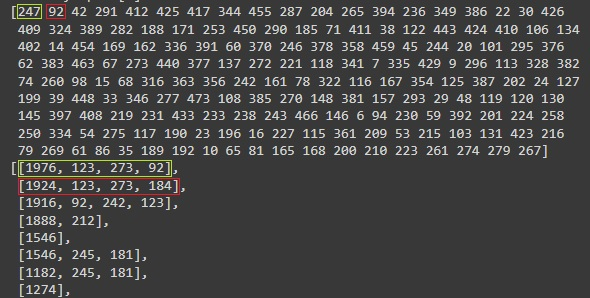

Para exemplificar melhor, será utilizado o primeiro colaborador.

**247** - Número de matrícula do colaborador (Primeira linha - Primeiro Conjunto)

**[1976, 123, 273, 92]** - Número de espera em dia até as promoções/méritos (Primeira linha - Segundo Conjunto)

Logo, concluí-se que o colaborador de número **247** obteve 4 promoções/méritos até o momento, sendo:


*   **1976** dias até a primeira promoção/mérito;
*   **123** dias da primeira até a segunda promoção/mérito;
*   **273** dias da segunda até a terceira promoção/mérito;
*   **92** dias da terceira até a quarta promoção/mérito;





## 2.8. Exclusão de Colunas não utilizadas

A partir da análise dos dados foi decidido pela retirada de algumas colunas da "Base Colaboradores Everymind", sendo elas as colunas "Etnia", "Nome Completo" e "Codinome". Abaixo é apresentado as colunas que foram excluídas e os motivos pelos quais elas não seram comtempladas no modelo.

Em primeiro lugar a exclusão da coluna "Etnia" foi motivada pela sensibilidade dos dados e ser antiético a análise da permanência de colaboradores a partir da etnia destes. Nesse prisma, a continuidade dessa coluna criará um modelo com resultados enviesados. 

In [ ]:
#O comando abaixo é responsável por excluir a coluna "Etnia" na base de dados 
df = df.drop(columns=['Etnia']) 

Já a retirada da coluna "Nome Completo" e "Codinome" ocorreu por esta não contribuir de forma alguma com a construção do modelo, uma vez que, um nome não pode ser um fator de decisão.

In [ ]:
#O comando abaixo é responsável por excluir a coluna "Nome Completo" na base de dados 
df = df.drop(columns=['Nome Completo'])

In [ ]:
#O comando abaixo é responsável por excluir a coluna "Codinome" na base de dados 
df1 = df1.drop(columns=['Codinome'])

Abaixo apresenta-se a exibição das tabelas, já com a exclusão das colunas.

In [ ]:
#Leitura da Planilha Everymind sem a coluna "Etnia" e "Nome Completo"
df.head()

,Matrícula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,Tempo Empresa Meses,Colaborador
0,476.0,2022-06-06,2022-09-23,Ativo,FuncionalPl,2250.0,1985-02-06,Masculino,Casado,Superiorincompleto,PR,Curitiba,CPG&RetailI,37,3,1
1,373.0,2022-02-14,2022-09-23,Ativo,FuncionalJr,1600.0,1998-11-11,Feminino,Solteiro,Superiorincompleto,PB,JoãoPessoa,Core&IndustriasII,23,7,10
2,392.0,2022-02-03,2022-09-23,Ativo,MarketingPL,4000.0,1988-11-21,Feminino,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,33,7,100
3,110.0,2019-02-12,2022-09-23,Ativo,FuncionalSr,4957.2,1983-07-30,Masculino,Divorciado,Graduação,SP,SãoPaulo,Core&IndustriasI,39,43,101
4,319.0,2021-04-10,2022-09-23,Ativo,GerenteVendasIII,8715.9,1983-01-27,Masculino,Solteiro,PósGraduação,SP,SãoPaulo,Vendas,39,17,102


In [ ]:
#Leitura da Planilha Reconhecimento sem a coluna "Codinome"
df1.head()

,Matricula,Situação,Data de Admissão,Data Vigência,Alterou Função,Motivo,Novo Salario,Novo Cargo,Colaborador,Tempo Ate Promocao Meses,Espera de promoção
0,2.0,Ativo,2015-02-02,2021-11-01,Sim,PROMOÇÃO,9000.0,GerenteSr,247,81,2464
1,2.0,Ativo,2015-02-02,2021-08-01,Não,MÉRITO,7000.0,Arquiteto,247,78,2372
2,2.0,Ativo,2015-02-02,2020-11-01,Não,MÉRITO,6000.0,Arquiteto,247,69,2099
3,2.0,Ativo,2015-02-02,2020-07-01,Sim,PROMOÇÃO,5200.0,Arquiteto,247,65,1976
4,3.0,Ativo,2015-03-26,2022-02-01,Sim,PROMOÇÃO,8250.0,GerenteSr,92,83,2504


## 2.9. Planilha Ambiente de trabalho - Motivo da não utilização

A aba “Ambiente de Trabalho 27.07” da base de colaboradores da Everymind não foi utilizada para realizar o modelo preditivo, pelos motivos citados abaixo:



1.   A pesquisa de satisfação contém apenas o resultado das divisões da empresa, no qual se trata da média das respostas de todos os colaboradores daquele determinado setor. Desse modo, não é possível relacionar a pesquisa a algum colaborador específico da aba “Everymind”. Sendo assim, não seria possível realizar uma predição confiável, sem realizar essa conexão.
2.   A pesquisa de satisfação é realizada a cada três meses. Contudo a aba “Ambiente de Trabalho 27.07” só contém dados referentes a um determinado período. Sendo assim, se torna inviável encontrar padrões consistentes, pois não há parâmetros de comparação.

## 2.10. One Hot encoding

  Para utilizarmos as variáveis categóricas é necessário realizar uma transformação nos dados, que resultam em formas binárias (não ordenada), as quais serão aplicadas em futuras equações matemáticas no modelo de aprendizado de máquina.

  Nesse aspecto, o código abaixo utiliza um data frame, que seleciona a coluna específicada corresponde às propriedades (campos) da base de dados e suas linhas são identificadas como um registro. 



1.   Planilha - Everymind



In [ ]:
#As variáveis criadas são utilizadas para receber os valores da coluna do Data Frame selecionado

data_saidas = pd.DataFrame(df, columns=["Tipo Saida"])
data_cargos = pd.DataFrame(df, columns=["Cargo"])
data_genero = pd.DataFrame(df, columns=["Genero"])
data_civil = pd.DataFrame(df, columns=["Estado Civil"])
data_estado = pd.DataFrame(df, columns=["Estado"])
data_cidade = pd.DataFrame(df, columns=["Cidade"])
data_area = pd.DataFrame(df, columns=["Area"])

In [ ]:
#As variáveis criadas são utilizadas para receber a aplicação do One Hot encoding pelo pandas
#Para isso, utilizam-se das variáveis com os data frames criados acima 

dummie_saidas = pd.get_dummies(data_saidas["Tipo Saida"])
dummie_cargos = pd.get_dummies(data_cargos["Cargo"]) 
dummie_genero = pd.get_dummies(data_genero["Genero"])
dummie_civil = pd.get_dummies(data_civil["Estado Civil"]) 
dummie_estado = pd.get_dummies(data_estado["Estado"]) 
dummie_cidade = pd.get_dummies(data_cidade["Cidade"]) 
dummie_area = pd.get_dummies(data_area["Area"]) 

O comando abaixo é responsável por realizar a leitura e apresentação dos dados carregados gerando as matrizes do One Hot Encoding. Para alterar a visualização das matrizes mude o parâmetro do display com as variáveis a seguir: 


1. dummie_saidas
2. dummie_cargos
3. dummie_genero
4. dummie_civil
5. dummie_estado
6. dummie_cidade
7. dummie_area



In [ ]:
display(dummie_civil) #Exemplo de visualização de matriz

,Casado,Divorciado,Separado,Solteiro,UniãoEstável
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
470,0,0,0,1,0
471,0,0,0,1,0
472,0,0,0,1,0
473,1,0,0,0,0


2. Planilha - Reconhecimento

In [ ]:
#As variáveis criadas são utilizadas para receber os valores da coluna do Data Frame selecionado

data_situacao = pd.DataFrame(df1, columns=["Situação"])
data_motivo = pd.DataFrame(df1, columns=["Motivo"])
data_novo_cargo = pd.DataFrame(df1, columns=["Novo Cargo"])
data_alterou_funcao = pd.DataFrame(df1, columns=["Alterou Função"])

In [ ]:
#As variáveis criadas são utilizadas para receber a aplicação do One Hot encoding pelo pandas
#Para isso, utilizam-se das variáveis com os data frames criados acima 

dummie_situacao = pd.get_dummies(data_situacao["Situação"])
dummie_motivo = pd.get_dummies(data_motivo["Motivo"]) 
dummie_novo_cargo = pd.get_dummies(data_novo_cargo["Novo Cargo"]) 
dummie_alterou_funcao = pd.get_dummies(data_alterou_funcao["Alterou Função"])

O comando abaixo é responsável por realizar a leitura e apresentação dos dados carregados gerando as matrizes do One Hot Encoding. Para alterar a visualização das matrizes mude o parâmetro do display com as variáveis a seguir:

*   dummie_situacao
*   dummie_motivo
*   dummie_novo_cargo
*   dummie_alterou_funcao







In [ ]:
display(dummie_motivo) #Exemplo de visualização de matriz

,MÉRITO,PROMOÇÃO,RECLASSIFCARGO
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
...,...,...,...
334,0,1,0
335,1,0,0
336,1,0,0
337,1,0,0


3. Planilha - Ambiente de trabalho

In [ ]:
#As variáveis criadas são utilizadas para receber os valores da coluna do Data Frame selecionado

data_divisao = pd.DataFrame(df2, columns=["Divisao"])
data_pilar = pd.DataFrame(df2, columns=["Pilar"])
data_fator = pd.DataFrame(df2, columns=["Fator"])
data_pergunta = pd.DataFrame(df2, columns=["Pergunta"])
data_confiabilidade = pd.DataFrame(df2, columns=["Taxa de Confiabilidade"])

In [ ]:
#As variáveis criadas são utilizadas para receber a aplicação do One Hot encoding pelo pandas
#Para isso, utilizam-se das variáveis com os data frames criados acima 

dummie_divisao = pd.get_dummies(data_divisao ["Divisao"])
dummie_pilar = pd.get_dummies(data_pilar["Pilar"]) 
dummie_fator = pd.get_dummies(data_fator["Fator"]) 
dummie_pergunta = pd.get_dummies(data_pergunta["Pergunta"])
dummie_confiabilidade = pd.get_dummies(data_confiabilidade["Taxa de Confiabilidade"])

O comando abaixo é responsável por realizar a leitura e apresentação dos dados carregados gerando as matrizes do One Hot Encoding. Para alterar a visualização das matrizes mude o parâmetro do display com as variáveis a seguir:



*  dummie_divisao
*  dummie_pilar
*  dummie_fator
*  dummie_pergunta
*  dummie_confiabilidade


In [ ]:
display(dummie_divisao) #Exemplo de visualização de matriz

,AMS&PS,Analytics&Integration,CPG&RetailI,CPG&RetailII,Commerce,Core&IndustriasI,Core&IndustriasII,Everymind,MktCloud,People&Culture,Vendas
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1689,0,0,0,0,0,0,0,0,0,0,1
1690,0,0,0,0,0,0,0,0,0,0,1
1691,0,0,0,0,0,0,0,0,0,0,1
1692,0,0,0,0,0,0,0,0,0,0,1


## 2.11. Label Encoder

  Algumas colunas apresentam a necessidade de seus dados serem apresentados com relação de ordem. A conversão de variáveis categóricas para variáveis ordinárias é realizado através do Label Encoder. No modelo preditivo construído, a única variável que foi modificada utilizando esse método, foi a coluna de escolaridade. No código abaixo é representado a forma como ocorreu tal processo.

In [ ]:
#A variável criada é utilizada para receber o valore da coluna do Data Frame selecionado
data_escolaridade = pd.DataFrame(df, columns=["Escolaridade "])

In [ ]:
#A variável criada é utilizada para receber os dados pertencentes à coluna "Escolaridade" e ordená-los, respectivamente.
dummie_escolaridade_atual = data_escolaridade.replace(['Ensino Médio Incompleto', 'Ensino Médio', 'Técnico', 'Graduação', 'Superior incompleto', 'Pós Graduação', 'Mestrado'], [0,1,2,3,4,5,6])

O comando abaixo é responsável por realizar a leitura e apresentação dos dados carregados gerando a matriz com o método label encoder.

In [ ]:
display(dummie_escolaridade_atual)

,Escolaridade
0,Superiorincompleto
1,Superiorincompleto
2,Superiorincompleto
3,3
4,PósGraduação
...,...
470,Superiorincompleto
471,Superiorincompleto
472,Superiorincompleto
473,PósGraduação


## 2.12. Criação novo Database

>Divisão de Funcionários Ativos e Desligados



Na tarefa de seleção de dados é onde é definida a relevância do atributo. Para atingir esse objetivo, foi necessário criar duas bases de dados com a divisão entre atributos focados nos funcionários ativos e desligados. De modo que fosse possível compreender como a relação de determinados atributos se comportam em cada um dos casos.


###2.12.1. Criação Database (Colaboradores Ativos)

Abaixo apresenta-se a criação da base de funcionários “Ativos”, através da seleção dos dados da planilha “Everymind".

In [ ]:
#O comando é responsável por atribuir a base de dados “Df” a variável “df_Ativo"
df_Ativo = df.copy()

#O comando é responsável por excluir a linha de dados que possui o “Tipo Saida” igual a um determinado valor
df_Ativo.drop(df_Ativo.loc[df_Ativo['Tipo Saida']=='Dispensa sem Justa Causa'].index, inplace=True)
df_Ativo.drop(df_Ativo.loc[df_Ativo['Tipo Saida']=='Pedido de Demissão'].index, inplace=True)
df_Ativo.drop(df_Ativo.loc[df_Ativo['Tipo Saida']=='Rescisao Contrato Exp - Pedido'].index, inplace=True)
df_Ativo.drop(df_Ativo.loc[df_Ativo['Tipo Saida']=='Rescisao Contrato Exp - Dispensa'].index, inplace=True)

O código abaixo serve para visualizar a nova base de dados de funcionários ativos

In [ ]:
#O código abaixo é utilizado para visualizar a base de dados “df_Ativo”
df_Ativo

,Matrícula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,Tempo Empresa Meses,Colaborador
0,476.0,2022-06-06,2022-09-23,Ativo,FuncionalPl,2250.0,1985-02-06,Masculino,Casado,Superiorincompleto,PR,Curitiba,CPG&RetailI,37,3,1
1,373.0,2022-02-14,2022-09-23,Ativo,FuncionalJr,1600.0,1998-11-11,Feminino,Solteiro,Superiorincompleto,PB,JoãoPessoa,Core&IndustriasII,23,7,10
2,392.0,2022-02-03,2022-09-23,Ativo,MarketingPL,4000.0,1988-11-21,Feminino,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,33,7,100
3,110.0,2019-02-12,2022-09-23,Ativo,FuncionalSr,4957.2,1983-07-30,Masculino,Divorciado,Graduação,SP,SãoPaulo,Core&IndustriasI,39,43,101
4,319.0,2021-04-10,2022-09-23,Ativo,GerenteVendasIII,8715.9,1983-01-27,Masculino,Solteiro,PósGraduação,SP,SãoPaulo,Vendas,39,17,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,503.0,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,2003-04-02,Masculino,Solteiro,Superiorincompleto,SP,SãoPaulo,AgenciaDigital,19,5,95
471,409.0,2022-03-16,2022-09-23,Ativo,Trainee-Dev,1017.0,1994-01-10,Masculino,Solteiro,Superiorincompleto,SP,SãoPaulo,CPG&RetailII,28,6,96
472,504.0,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,1991-09-28,Masculino,Solteiro,Superiorincompleto,SP,PraiaGrande,CPG&Retail,30,5,97
473,151.0,2020-04-13,2022-09-23,Ativo,DevSr,4681.8,1990-03-12,Masculino,Casado,PósGraduação,SP,BragançaPaulista,CPG&RetailI,32,29,98


###2.12.2. Criação Database (Colaboradores Desligados)

Abaixo apresenta-se a criação da base de funcionários “Desligado”, através da seleção dos dados da planilha “Everymind”, abrangendo as seguintes categorias: Dispensa sem Justa Causa, Pedido de Demissão, Rescisao Contrato Exp - Pedido e Rescisao Contrato Exp - Dispensa.

In [ ]:
#O comando é responsável por atribuir a base de dados “Df” a variável “df_Desligado"
df_Desligado = df.copy()
#O comando é responsável por excluir a linha de dados que possui o “Tipo Saida” igual a um determinado valor
df_Desligado.drop(df_Desligado.loc[df_Desligado['Tipo Saida']=='Ativo'].index, inplace=True)

O código abaixo serve para visualizar a nova base de dados de funcionários desligador

In [ ]:
#O código abaixo é utilizado para visualizar a base de dados “df_Desligado”
df_Desligado

,Matrícula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,Estado,Cidade,Area,Idade,Tempo Empresa Meses,Colaborador
96,381.0,2022-08-01,2022-07-15,DispensasemJustaCausa,DevEspecialista,6000.000,1992-12-03,Feminino,Casado,Graduação,SP,SãoPaulo,Core&IndustriasI,29,-1,400
114,75.0,2022-08-01,2020-01-17,PedidodeDemissão,DevEspecialista,837.785,1970-10-26,Masculino,Casado,PósGraduação,SP,SãoPaulo,Vendas,49,-31,421
208,20.0,2022-08-01,2021-10-29,PedidodeDemissão,DevEspecialista,4406.965,1981-06-16,Masculino,Solteiro,Graduação,SP,Santos,AMS,40,-10,287
209,33.0,2022-08-01,2021-11-12,PedidodeDemissão,DevEspecialista,4627.315,1980-12-24,Masculino,Casado,Graduação,SP,SãoPaulo,Core&IndustriasI,40,-9,349
210,43.0,2022-08-01,2020-02-21,PedidodeDemissão,DevEspecialista,4858.615,1987-06-01,Masculino,Solteiro,Graduação,SP,Guarulhos,Core&IndustriasI,32,-30,285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,235.0,2022-08-01,2021-11-16,PedidodeDemissão,Trainee-Dev,1000.000,1996-04-26,Masculino,Solteiro,Superiorincompleto,SP,Jundiaí,MktCloud,25,-9,315
414,411.0,2022-08-01,2022-07-15,PedidodeDemissão,Trainee-Dev,1017.000,2000-10-23,Masculino,Solteiro,Superiorincompleto,SP,Osasco,CPG&RetailI,21,-1,359
415,238.0,2022-08-01,2022-04-01,PedidodeDemissão,Trainee-Dev,1067.735,2001-10-11,Masculino,Solteiro,Superiorincompleto,SP,Suzano,Analytics,20,-4,368
416,403.0,2022-08-01,2022-06-01,RescisaoContratoExp-Pedido,Trainee-Dev,1017.000,2000-09-16,Feminino,Solteiro,EnsinoMédio,SP,SãoPaulo,BestMinds,21,-2,297


## 2.13. Análise de colunas



> Relação de funcionarios ativos e desligados com cargo



Essa análise serve para identificar possíveis dados enviesados, de modo que seja possível entender o real impacto de uma variável, levando em consideração a quantidade total de funcionários por cargo.



O comando abaixo é responsável por realizar a contagem total de funcionários por cargo da base de dados “df_Desligados"

In [ ]:
df_Desligado['Cargo'].value_counts()

DevPl                    47
DevJr                    29
DevSr                    17
Trainee-Dev              16
FuncionalPl              15
DevEspecialista          15
FuncionalJr              12
FuncionalSr              10
Arquiteto                 7
Gerente                   5
GerenteVendasI            4
FuncionalEspecialista     3
Consultor                 3
ScrumMasterJr             2
GerenteVendasII           2
ArquitetoSr               1
ComercialIS               1
TesteSr                   1
Name: Cargo, dtype: int64

O comando abaixo é responsável por realizar a contagem total de funcionários por cargo da base de dados “df_Ativos

In [ ]:
df_Ativo['Cargo'].value_counts()

Trainee-Dev              98
DevPl                    72
DevJr                    60
FuncionalPl              39
DevSr                    32
DevEspecialista          27
Gerente                  27
FuncionalJr              23
FuncionalSr              18
Arquiteto                11
Diretor                   8
GerenteVendasI            7
FuncionalEspecialista     7
GerenteSr                 6
PessoasPl                 5
Consultor                 3
Estagiaria                3
ScrumMasterJr             3
ArquitetoSr               3
Trainee-Funcional         3
EducaçãoPl                2
GerenteVendasII           2
MarketingPL               2
TesteSr                   1
AuxiliardeLimpeza         1
GerentePV                 1
FinanceiroJr              1
ComercialIS               1
AssistenteII              1
InfraestruturaJr          1
ComercialPl               1
TesteJr                   1
GerenteCSSr               1
GerenteVendasIII          1
AssistenteI               1
VicePresidente      

## 2.14. Gráficos Gerados

###2.14.1. Relação entre “Idade" e “Cargo”

> Funcionários ativos e desligados



O comando abaixo é responsável por gerar um gráfico de dispersão, levando em consideração os funcionários ativos, fazendo a relação dos dados idade (eixo x) e cargo (eixo y)

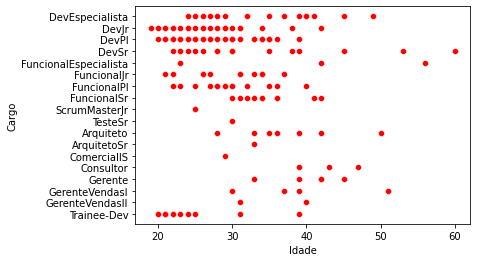

In [ ]:
sns.scatterplot(data = df_Desligado, x = 'Idade', y = 'Cargo', color='Red')

O comando abaixo é responsável por gerar um gráfico de dispersão, levando em consideração os funcionários desligados, fazendo a relação dos dados idade (eixo x) e cargo (eixo y)

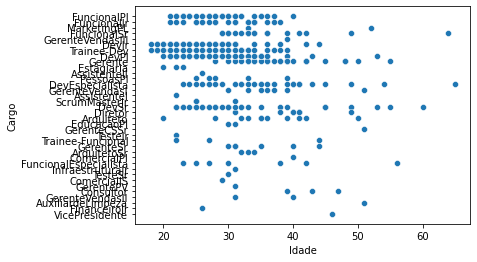

In [ ]:
sns.scatterplot(data = df_Ativo, x = 'Idade', y = 'Cargo')

###2.14.2. Relação entre “Salario Mês" e “Cargo”


>  Funcionários ativos e desligados



O comando abaixo é responsável por gerar um gráfico de dispersão, levando em consideração os funcionários ativos, fazendo a relação dos dados salário mês (eixo x) e cargo (eixo y)

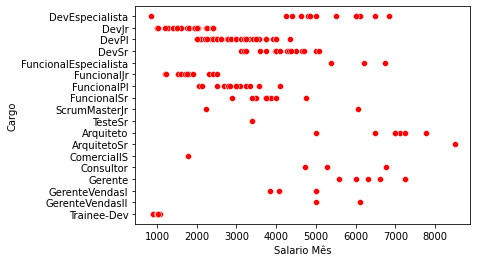

In [ ]:
sns.scatterplot(data = df_Desligado, x = 'Salario Mês', y = 'Cargo', color='Red')

O comando abaixo é responsável por gerar um gráfico de dispersão, levando em consideração os funcionários desligados, fazendo a relação dos dados salário mês (eixo x) e cargo (eixo y)

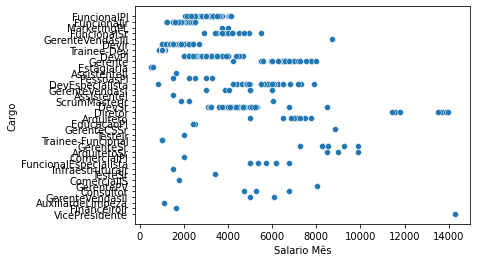

In [ ]:
sns.scatterplot(data = df_Ativo, x = 'Salario Mês', y = 'Cargo')

###2.14.3. Relação entre “Tempo Empresa Meses" e “Cargo”



> Funcionários ativos e desligados



O comando abaixo é responsável por gerar um gráfico de dispersão, levando em consideração os funcionários ativos, fazendo a relação dos dados tempo de empresa do colaborador por mês (eixo x) e cargo (eixo y)

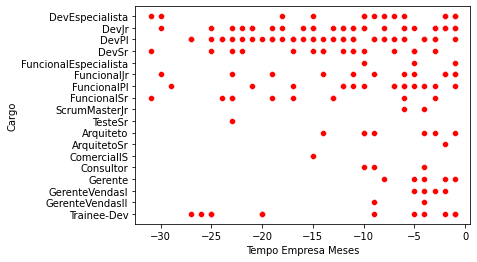

In [ ]:
sns.scatterplot(data = df_Desligado, x = 'Tempo Empresa Meses', y = 'Cargo', color='Red')

O comando abaixo é responsável por gerar um gráfico de dispersão, levando em consideração os funcionários desligados, fazendo a relação dos dados tempo de empresa do colaborador por mês (eixo x) e cargo (eixo y)

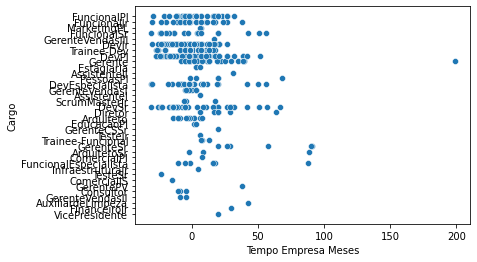

In [ ]:
sns.scatterplot(data = df_Ativo, x = 'Tempo Empresa Meses', y = 'Cargo')

###2.14.4. Relação entre "Dt Saída" e "Cargo"

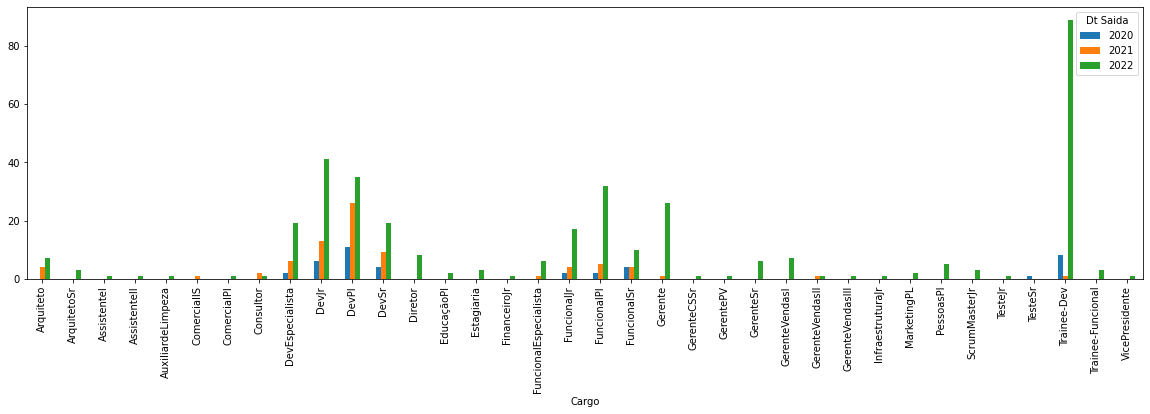

In [ ]:
#Agrupa os dados pelos atributos 'Dt Saida' e 'Cargo' contabilizando o tamanho do agrupamento
dfg = df.groupby([df['Dt Saida'].dt.year, 'Cargo' ]).size() 

#Desempilha os dados do dataframe e preenche todos os elementos vazios
dfg = dfg.unstack(level=0).fillna(0)

#Cria um gráfico de barras com o dfg alterado
dfg.plot(kind = 'bar', figsize=(20,5))

### 2.14.5. Mapa de calor com a relação das variáveis

In [ ]:
matriz_corr = df.corr().style.background_gradient(cmap='coolwarm')
matriz_corr

,Matrícula,Salario Mês,Idade,Tempo Empresa Meses
Matrícula,1.000000,-0.206154,-0.011291,0.058777
Salario Mês,-0.206154,1.000000,0.519589,0.303817
Idade,-0.011291,0.519589,1.000000,0.140799
Tempo Empresa Meses,0.058777,0.303817,0.140799,1.000000


In [ ]:
target_corr = matriz_corr.data.Idade
df_corr = target_corr.abs().sort_values(ascending=False).to_frame().style.background_gradient(cmap='coolwarm')
df_corr

,Idade
Idade,1.000000
Salario Mês,0.519589
Tempo Empresa Meses,0.140799
Matrícula,0.011291


## 2.15. Novo Database - Everymind e Reconhecimento

Após todas as transformações e padronizações dos dados obtidos da planilha geral "Everymind", é necessário concatenar os novos dados em um novo Database. Que será utilizado para o treinamento e teste do modelo preditivo.

In [ ]:
#Definição do nome do novo database
DataBase_everymind = pd.DataFrame()

#Atribuindo as colunas modificadas da planilha geral da everymind, ao novo database criado
DataBase_everymind = pd.concat([DataBase_everymind,df['Matrícula']], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,df['Colaborador']], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,df['Idade']], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,df['Tempo Empresa Meses']], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,df['Salario Mês']], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,dummie_saidas], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,dummie_cargos], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,dummie_genero], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,dummie_civil], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,dummie_estado], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,dummie_cidade], axis = 1)
DataBase_everymind = pd.concat([DataBase_everymind,dummie_area], axis = 1)

#Exibi-se o novo database criado
display(DataBase_everymind)

,Matrícula,Colaborador,Idade,Tempo Empresa Meses,Salario Mês,Ativo,DispensasemJustaCausa,PedidodeDemissão,RescisaoContratoExp-Dispensa,RescisaoContratoExp-Pedido,...,Diretoria,Education,Financeiro,Infraestrutura,Integration,MktCloud,PS,People,Produtos,Vendas
0,476.0,1,37,3,2250.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,373.0,10,23,7,1600.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,392.0,100,33,7,4000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,110.0,101,39,43,4957.2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,319.0,102,39,17,8715.9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,503.0,95,19,5,1017.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,409.0,96,28,6,1017.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,504.0,97,30,5,1017.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,151.0,98,32,29,4681.8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Após todas as transformações e padronizações dos dados obtidos da planilha "Reconhecimento", é necessário concatenar os novos dados em um novo Database. Que será utilizado para o treinamento e teste do modelo preditivo.

In [ ]:
#Definição do nome do novo database
DataBase_reconhecimento = pd.DataFrame()

#Atribuindo as colunas modificadas da planilha geral da everymind, ao novo database criado
DataBase_reconhecimento = pd.concat([DataBase_reconhecimento,df1['Matricula']], axis = 1)
DataBase_reconhecimento = pd.concat([DataBase_reconhecimento,df1['Novo Salario']], axis = 1)
DataBase_reconhecimento = pd.concat([DataBase_reconhecimento,df1['Colaborador']], axis = 1)
DataBase_reconhecimento = pd.concat([DataBase_reconhecimento,df1['Tempo Ate Promocao Meses']], axis = 1)
DataBase_reconhecimento = pd.concat([DataBase_reconhecimento,dummie_situacao], axis = 1)
DataBase_reconhecimento = pd.concat([DataBase_reconhecimento,dummie_motivo], axis = 1)
DataBase_reconhecimento = pd.concat([DataBase_reconhecimento,dummie_novo_cargo], axis = 1)
DataBase_reconhecimento = pd.concat([DataBase_reconhecimento,dummie_alterou_funcao], axis = 1)

#Exibi-se o novo database criado
display(DataBase_reconhecimento)

,Matricula,Novo Salario,Colaborador,Tempo Ate Promocao Meses,Afastado,Ativo,Desligado,MÉRITO,PROMOÇÃO,RECLASSIFCARGO,...,GerentePV,GerenteSr,GerenteVendasI,LiderIS,PVSr,PessoasPl,SMJr,Trainee-Dev,Não,Sim
0,2.0,9000.000,247,81,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,2.0,7000.000,247,78,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.0,6000.000,247,69,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2.0,5200.000,247,65,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3.0,8250.000,92,83,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,447.0,1616.210,274,11,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
335,448.0,3491.660,279,11,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
336,448.0,3371.370,279,9,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
337,460.0,1716.480,267,17,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## 2.16. Salvando um arquivo com as novas Base de Dados

Após as criação dos novos databases, 1) Everymind e 2) Reconhecimento, o código abaixo é responsável por salvar essa nova planilha em um documento com extensão .xlsx

In [ ]:
DataBase_everymind.to_excel('DataBase_Everymind.xlsx')
DataBase_reconhecimento.to_excel('DataBase_Reconhecimento.xlsx')

## 2.17. Juntando as tabelas everymind e reconhecimento

O código abaixo é responsável por integrar as tabelas gerais da everymind com a de reconhecimento de colaboradores. Afim de melhorar a visualização e facilitar a análise dos dados da base.

In [ ]:
#criação de colunas para armazenar respectivamente, o numero de promoções, o tempo medio para as receber, e o motivo se foi promoção ou merito 
df['Numero Promocoes'] = 0
df['Tempo Medio Promocao'] = 0
df['Promocao'] = 0
df['Merito'] = 0

In [ ]:
#organiza a tabela por ordem crescente de data
df1 = df1.sort_values(by = "Data Vigência")
#a função for passa por todas as linhas da tabela df1
for i in range(0,len(df1['Data Vigência'])):
  #muda o formato da Data de Vigencia para o formato padrão
  df1['Data Vigência'][i] = moment.date(df1['Data Vigência'][i]).format("YYYY-MM-DD")
  #a função for passa por todas as linhas da tabela df
  for h in range(0,len(df['Colaborador'])): 
    #se o conteudo da linha colaborador na df for igual a na df1
    if df['Colaborador'][h] == df1['Colaborador'][i]:
      #se a promoção ocorreu antes da pessoa sair
      if df['Dt Saida'][h].year <= df1['Data Vigência'][i].year:
          #numero de promoções aumenta em 1
          df['Numero Promocoes'][h] += 1 
          #O tempo medio de promoção e igual o tempo ate a ultima promoção dividido pelo numero de promoções
          df['Tempo Medio Promocao'][h] = df1['Tempo Ate Promocao Meses'][i]/df['Numero Promocoes'][h] 
          #se foi promoção
          if df1['Motivo'][i] == "PROMOÇÃO":
            # a pessoa recebe mais um em contagem de promoções
            df['Promocao'][h] +=1
          #se foi merito
          if df1['Motivo'][i] == "MÉRITO":
            # a pessoa recebe mais 1 na contagem de merito
            df['Merito'][h] += 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCop

Para facilitar a visualização das mudanças de cargo foi criada uma nova coluna que define de forma binária (Sim ou Não), se o funcionário teve o seu cargoa alterado.

In [ ]:
#Definição de uma nova coluna e definindo todos os espaços dela com a palavra "Não"
df['Mudou de Cargo'] = "Não"

#O comando percorre todas as linhas da coluna "Alterou Função" e o número do "Colaborador" 
for i in range(0,len(df1['Alterou Função'])):
  for h in range(0,len(df['Colaborador'])):
    #Caso o cboladorador tenha alterado de função o campo na coluna "Mudou de cargo" é preenchido com a palavra "Sim"
    if df['Colaborador'][h] == df1['Colaborador'][i] and df1['Alterou Função'][i] == 'Sim':
      df['Mudou de Cargo'][h] = 'Sim'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


O camando abaixo exibe a tabela geral everymind após as alterações.

In [ ]:
df

,Matrícula,Dt Admissao,Dt Saida,Tipo Saida,Cargo,Salario Mês,Dt Nascimento,Genero,Estado Civil,Escolaridade,...,Cidade,Area,Idade,Tempo Empresa Meses,Colaborador,Numero Promocoes,Tempo Medio Promocao,Promocao,Merito,Mudou de Cargo
0,476.0,2022-06-06,2022-09-23,Ativo,FuncionalPl,2250.0,1985-02-06,Masculino,Casado,Superiorincompleto,...,Curitiba,CPG&RetailI,37,3,1,0,0,0,0,Não
1,373.0,2022-02-14,2022-09-23,Ativo,FuncionalJr,1600.0,1998-11-11,Feminino,Solteiro,Superiorincompleto,...,JoãoPessoa,Core&IndustriasII,23,7,10,1,5,1,0,Sim
2,392.0,2022-02-03,2022-09-23,Ativo,MarketingPL,4000.0,1988-11-21,Feminino,Solteiro,Superiorincompleto,...,SãoPaulo,AgenciaDigital,33,7,100,0,0,0,0,Não
3,110.0,2019-02-12,2022-09-23,Ativo,FuncionalSr,4957.2,1983-07-30,Masculino,Divorciado,Graduação,...,SãoPaulo,Core&IndustriasI,39,43,101,1,26,1,0,Sim
4,319.0,2021-04-10,2022-09-23,Ativo,GerenteVendasIII,8715.9,1983-01-27,Masculino,Solteiro,PósGraduação,...,SãoPaulo,Vendas,39,17,102,0,0,0,0,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,503.0,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,2003-04-02,Masculino,Solteiro,Superiorincompleto,...,SãoPaulo,AgenciaDigital,19,5,95,0,0,0,0,Não
471,409.0,2022-03-16,2022-09-23,Ativo,Trainee-Dev,1017.0,1994-01-10,Masculino,Solteiro,Superiorincompleto,...,SãoPaulo,CPG&RetailII,28,6,96,0,0,0,0,Não
472,504.0,2022-04-07,2022-09-23,Ativo,Trainee-Dev,1017.0,1991-09-28,Masculino,Solteiro,Superiorincompleto,...,PraiaGrande,CPG&Retail,30,5,97,0,0,0,0,Não
473,151.0,2020-04-13,2022-09-23,Ativo,DevSr,4681.8,1990-03-12,Masculino,Casado,PósGraduação,...,BragançaPaulista,CPG&RetailI,32,29,98,0,0,0,0,Não


#3. Treinamento do modelo

Definição da variável alvo, se o calaborador ficou ou não na empresa.

In [ ]:
df['Saiu'] = df['Tipo Saida']

df.Saiu.replace({'Ativo':0, 'RescisaoContratoExp-Pedido':1, 'PedidodeDemissão':1, 'DispensasemJustaCausa':1, 'RescisaoContratoExp-Dispensa':1}, inplace=True)

##3.1. TESTE DE VARIÁVEIS 1

Neste primeiro teste de variáveis foram selecionadas as colunas:


1.   Salario Mês
2. dummie_cargos
3. dummie_genero
4. dummie_civil
5. dummie_estado
6. dummie_cidade
7. dummie_area



In [ ]:
'''
arvoree = pd.DataFrame()
arvoree = pd.concat([arvoree,df['Salario Mês']], axis = 1)
arvoree = pd.concat([arvoree,dummie_cargos], axis = 1)
arvoree = pd.concat([arvoree,dummie_genero], axis = 1)
arvoree = pd.concat([arvoree,dummie_civil], axis = 1)
arvoree = pd.concat([arvoree,dummie_estado], axis = 1)
arvoree = pd.concat([arvoree,dummie_cidade], axis = 1)
arvoree = pd.concat([arvoree,dummie_area], axis = 1)

x = arvoree
y = df[['Saiu']]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 44)
'''         

"\narvoree = pd.DataFrame()\narvoree = pd.concat([arvoree,df['Salario Mês']], axis = 1)\narvoree = pd.concat([arvoree,dummie_cargos], axis = 1)\narvoree = pd.concat([arvoree,dummie_genero], axis = 1)\narvoree = pd.concat([arvoree,dummie_civil], axis = 1)\narvoree = pd.concat([arvoree,dummie_estado], axis = 1)\narvoree = pd.concat([arvoree,dummie_cidade], axis = 1)\narvoree = pd.concat([arvoree,dummie_area], axis = 1)\n\nx = arvoree\ny = df[['Saiu']]\n\nx_train, x_test, y_train, y_test = train_test_split(x, y, \n                                                    test_size = 0.3, \n                                                    random_state = 44)\n"

##3.2. TESTE DE VARIÁVEIS 2

Neste primeiro teste de variáveis foram selecionadas as colunas:


1. Matrícula
2. Colaborador
3. Idade
4. Tempo Empresa Meses
5. Salario Mês
6. dummie_cargos
7. dummie_genero
8. dummie_civil
9. dummie_estado
10. dummie_cidade
11. dummie_area


In [ ]:
'''
arvore = pd.DataFrame()
arvore = pd.concat([arvore ,df['Idade']], axis = 1)
arvore = pd.concat([arvore ,df['Tempo Empresa Meses']], axis = 1)
arvore = pd.concat([arvore ,df['Salario Mês']], axis = 1)
arvore = pd.concat([arvore ,dummie_cargos], axis = 1)
arvore = pd.concat([arvore ,dummie_genero], axis = 1)
arvore = pd.concat([arvore ,dummie_civil], axis = 1)
arvore = pd.concat([arvore ,dummie_estado], axis = 1)
arvore = pd.concat([arvore ,dummie_cidade], axis = 1)
arvore = pd.concat([arvore ,dummie_area], axis = 1)

x = arvore
y = df['Saiu']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                random_state = 44)
'''

"\narvore = pd.DataFrame()\narvore = pd.concat([arvore ,df['Idade']], axis = 1)\narvore = pd.concat([arvore ,df['Tempo Empresa Meses']], axis = 1)\narvore = pd.concat([arvore ,df['Salario Mês']], axis = 1)\narvore = pd.concat([arvore ,dummie_cargos], axis = 1)\narvore = pd.concat([arvore ,dummie_genero], axis = 1)\narvore = pd.concat([arvore ,dummie_civil], axis = 1)\narvore = pd.concat([arvore ,dummie_estado], axis = 1)\narvore = pd.concat([arvore ,dummie_cidade], axis = 1)\narvore = pd.concat([arvore ,dummie_area], axis = 1)\n\nx = arvore\ny = df['Saiu']\n\nx_train, x_test, y_train, y_test = train_test_split(x, y, \n                                                    test_size = 0.3, \n                                                random_state = 44)\n"

##3.3. TESTE DE VARIÁVEIS 3

Neste primeiro teste de variáveis foram selecionadas as colunas:


1. Idade
2. Tempo Empresa Meses
3. Salario Mês
4. dummie_cargos
5. dummie_genero
6. dummie_civil
7. dummie_estado
8. dummie_cidade
9. dummie_area

In [ ]:
'''
from sklearn.model_selection import train_test_split

arvore = pd.DataFrame()
arvore = pd.concat([arvore ,df['Idade']], axis = 1)
arvore = pd.concat([arvore ,df['Tempo Empresa Meses']], axis = 1)
arvore = pd.concat([arvore ,df['Salario Mês']], axis = 1)
arvore = pd.concat([arvore ,dummie_cargos], axis = 1)
arvore = pd.concat([arvore ,dummie_genero], axis = 1)
arvore = pd.concat([arvore ,dummie_civil], axis = 1)
arvore = pd.concat([arvore ,dummie_estado], axis = 1)
arvore = pd.concat([arvore ,dummie_cidade], axis = 1)
arvore = pd.concat([arvore ,dummie_area], axis = 1)

x = arvore
y = df[['Saiu']]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                random_state = 44)
'''                                              

"\nfrom sklearn.model_selection import train_test_split\n\narvore = pd.DataFrame()\narvore = pd.concat([arvore ,df['Idade']], axis = 1)\narvore = pd.concat([arvore ,df['Tempo Empresa Meses']], axis = 1)\narvore = pd.concat([arvore ,df['Salario Mês']], axis = 1)\narvore = pd.concat([arvore ,dummie_cargos], axis = 1)\narvore = pd.concat([arvore ,dummie_genero], axis = 1)\narvore = pd.concat([arvore ,dummie_civil], axis = 1)\narvore = pd.concat([arvore ,dummie_estado], axis = 1)\narvore = pd.concat([arvore ,dummie_cidade], axis = 1)\narvore = pd.concat([arvore ,dummie_area], axis = 1)\n\nx = arvore\ny = df[['Saiu']]\n\nx_train, x_test, y_train, y_test = train_test_split(x, y, \n                                                    test_size = 0.3, \n                                                random_state = 44)\n"

##3.4. TESTE DE VARIÁVEIS 4

Neste primeiro teste de variáveis foram selecionadas as colunas:

1. Idade
2. Salario Mês
3. dummie_cargos
4. dummie_genero
5. dummie_civil
6. dummie_estado
7. dummie_cidade
8. dummie_area

In [ ]:
'''
arvore = pd.DataFrame()
arvore = pd.concat([arvore ,df['Idade']], axis = 1)
arvore = pd.concat([arvore ,df['Salario Mês']], axis = 1)
arvore = pd.concat([arvore ,dummie_cargos], axis = 1)
arvore = pd.concat([arvore ,dummie_genero], axis = 1)
arvore = pd.concat([arvore ,dummie_civil], axis = 1)
arvore = pd.concat([arvore ,dummie_estado], axis = 1)
arvore = pd.concat([arvore ,dummie_cidade], axis = 1)
arvore = pd.concat([arvore ,dummie_area], axis = 1)

x = arvore
y = df[['Saiu']]

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                random_state = 44)
'''

"\narvore = pd.DataFrame()\narvore = pd.concat([arvore ,df['Idade']], axis = 1)\narvore = pd.concat([arvore ,df['Salario Mês']], axis = 1)\narvore = pd.concat([arvore ,dummie_cargos], axis = 1)\narvore = pd.concat([arvore ,dummie_genero], axis = 1)\narvore = pd.concat([arvore ,dummie_civil], axis = 1)\narvore = pd.concat([arvore ,dummie_estado], axis = 1)\narvore = pd.concat([arvore ,dummie_cidade], axis = 1)\narvore = pd.concat([arvore ,dummie_area], axis = 1)\n\nx = arvore\ny = df[['Saiu']]\n\nx_train, x_test, y_train, y_test = train_test_split(x, y, \n                                                    test_size = 0.3, \n                                                random_state = 44)\n"

##3.5. TESTE VARIÁVEIS 5

In [ ]:
arvore = pd.DataFrame()
arvore = pd.concat([arvore ,df['Idade']], axis = 1)
arvore = pd.concat([arvore ,df['Tempo Empresa Meses']], axis = 1)
arvore = pd.concat([arvore ,df['Salario Mês']], axis = 1)

arvore = pd.concat([arvore ,df['Numero Promocoes']], axis = 1)
arvore = pd.concat([arvore ,df['Tempo Medio Promocao']], axis = 1)
arvore = pd.concat([arvore ,df['Promocao']], axis = 1)
arvore = pd.concat([arvore ,df['Merito']], axis = 1)

arvore = pd.concat([arvore ,dummie_cargos], axis = 1)
arvore = pd.concat([arvore ,dummie_genero], axis = 1)
arvore = pd.concat([arvore ,dummie_civil], axis = 1)
arvore = pd.concat([arvore ,dummie_estado], axis = 1)
arvore = pd.concat([arvore ,dummie_cidade], axis = 1)
arvore = pd.concat([arvore ,dummie_area], axis = 1)

x = arvore
y = df['Saiu']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                random_state = 44)

##3.6. Métricas de Avalição -  Definições

**Métricas de Avaliação dos modelos:**

A partir da importação da parte de "classification_report" da biblioteca "ScikitLearn.metrics" é possível 
avaliar o desempenho dos modelos usados, a partir da matriz de confusão gerada onde é mostrado o resultado
de predição de classificação de classes, - "SIM - (1)"para a possibilidade de sair e "NÃO - (0)" para o contrário, nesse caso -
são geradas as seguintes métricas de avaliação para os modelos de predição:




**Acuracidade:**
Exibida como "Accuracy" na linha da tabela gerada pelo "classification_report", ela nos da a quantidade de acertos, em porcentagem, de classificação
em relação a todas as possibilidades de acertos verdadeiros e falsos e erros verdadeiros e falsos que é calculado como: 


> TP+TN/(TP+TN+FP+FN);



**Recall:**
Exibida como "recall" na coluna da tabela gerada pelo "classification_report", ela nos mostra do que deveria ser previsto como classe "X", quanto conseguiu prever em porcentagem, e
é calculado como: 



> TP/(TP+FN);




**Precisão:**
Exibida como "precision" na coluna da tabela gerada pelo "classification_report", ela nos mostra de tudo que foi previsto como classe "X", quanto de fato é dessa classe em porcentagem, e é calculado como: 



> TP/(TP+FP);



**F1-Score:**
Exibida como "f1-score" na coluna da tabela gerada pelo "classification_report", ela gera uma pontuação em porcentagem que nos dá uma ideia de precisão e recall altos e baixos, e é 
calculado como: 


>2(precision*recall)/precision + recall;




##3.7. Árvore de Decisão

Pode-se definir a "Árvore de decisão" como uma operação supervisionada, utilizada em modelos de classificação e regressão, responsável neste caso, por realizar previsões de categorias discretas (Sim ou Não).

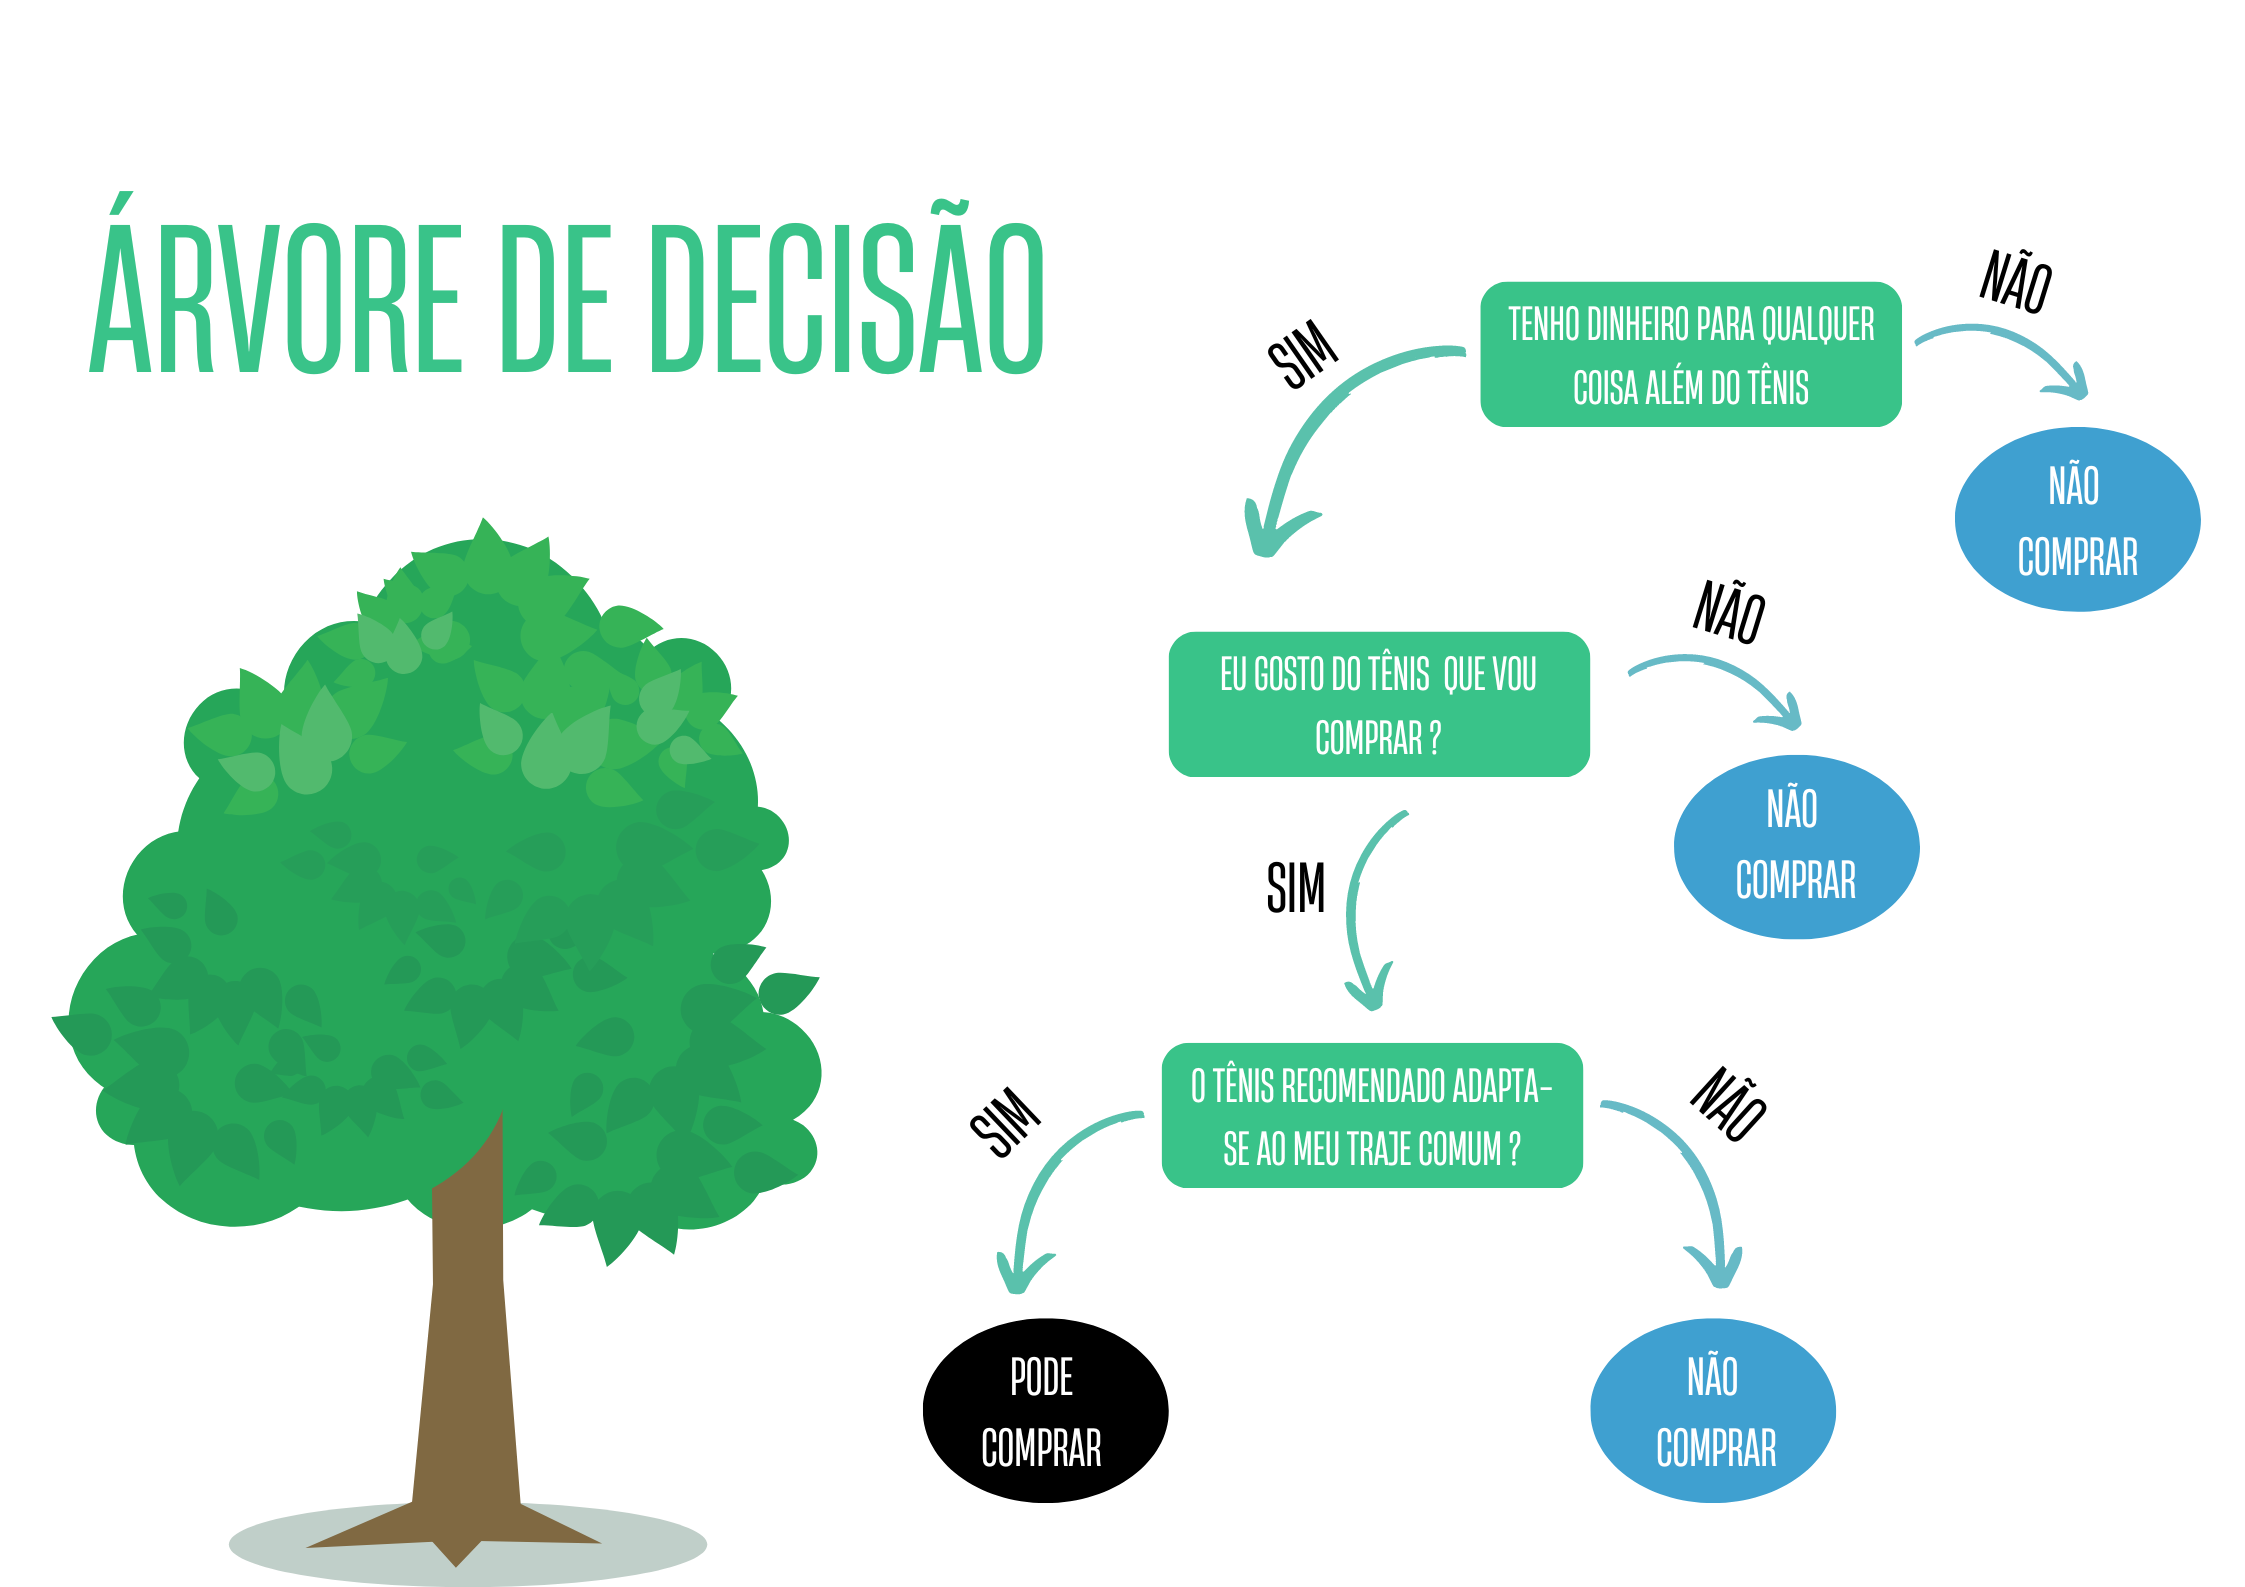

Abaixo apresenta-se o resultado da tabela criada para testar o modelo preditivo no algoritmo de árvore de decisão.

In [ ]:
arvore

,Idade,Tempo Empresa Meses,Salario Mês,Numero Promocoes,Tempo Medio Promocao,Promocao,Merito,Arquiteto,ArquitetoSr,AssistenteI,...,Diretoria,Education,Financeiro,Infraestrutura,Integration,MktCloud,PS,People,Produtos,Vendas
0,37,3,2250.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23,7,1600.0,1,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,33,7,4000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,43,4957.2,1,26,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,39,17,8715.9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,19,5,1017.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
471,28,6,1017.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
472,30,5,1017.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
473,32,29,4681.8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train.squeeze()

415    1
183    0
317    1
323    1
365    1
      ..
59     0
173    0
241    1
419    0
276    1
Name: Saiu, Length: 332, dtype: int64

In [ ]:
#Instanciando o algoritmo
dt = DecisionTreeClassifier()

#Treino do modelo
dt.fit(x_train, y_train.squeeze())

DecisionTreeClassifier()

Abaixo apresenta-se o resultado de Acuricidade para os dados separamos para treino e os dados de teste.



> Acuracia: A proximidade entre o valor obtido experimentalmente e o valor verdadeiro;



In [ ]:
print('Acuracidade (treino): ', dt.score( x_train, y_train ))
print('Acuracidade (teste): ', dt.score( x_test, y_test ))

Acuracidade (treino):  1.0
Acuracidade (teste):  0.9790209790209791


O código abaixo resulta na apresentação do resultado dos valores preditivos para teste do modelo

In [ ]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0])

Abaixo salva-se os valores de teste em uma variável para não ser sobrescrito quando rodado novamente.

In [ ]:
y_true = y_test
y_true

172    0
452    0
179    0
162    0
110    0
      ..
265    1
69     0
125    0
166    0
139    0
Name: Saiu, Length: 143, dtype: int64

Para entender os parâmetros utilizados pela árvore, abaixo é exibido uma imagem de como a árvore é construída.

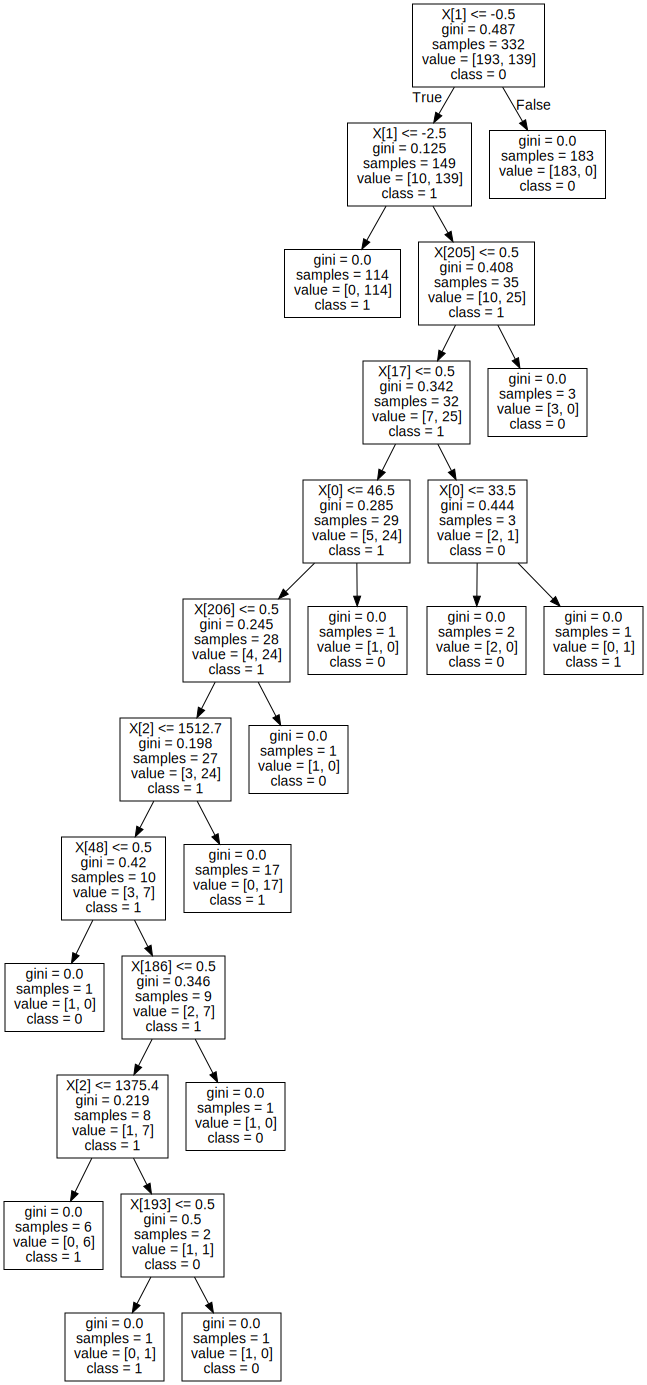

In [ ]:
dot_data = export_graphviz(dt, out_file=None, class_names=list(map(str, dt.classes_))) 
graph = graphviz.Source(dot_data)
graph.render('Arvore.pdf')
graph

###3.7.1. Matriz de Confusão - Árvore de decisão

Pode-se definir matriz de confusão como, uma tabela que representa a frequência de classificação para as variáveis declaradas no modelo. Podendo ser de quatro tipos:



1.   Verdadeiro positivo (true positive — TP): Quando o resultado esperado para aquele atributo foi previsto corretamente.
2.  Falso positivo (false positive — FP): Quando o resultado esperado para aquele atributo foi previsto incorretamente.
3. Falso verdadeiro (true negative — TN): Quando o atributo que não estamos buscando prever é previsto corretamente.
4. Falso negativo (false negative — FN): Quando o atributo que não estamos buscando prever é previsto incorretamente.


Abaixo segue o código responsável por pegar os dados analisados e exibi-los na matriz.

In [ ]:
cm = confusion_matrix(y_true, y_pred)
display(cm)

array([[88,  3],
       [ 0, 52]])

Para facilitar a visualização o código abaixo exibe a matriz de forma gráfica.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


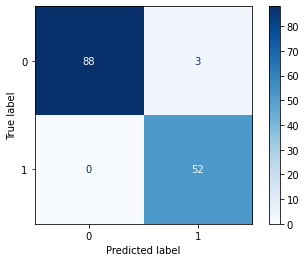

In [ ]:
plot_confusion_matrix(dt, x_test, y_test, cmap='Blues')

###3.7.2. Métricas - Árvore de decisão

O código abaixo é responsável por exibir as principais métricas relacionada à árvore de decisão.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        91
           1       0.95      1.00      0.97        52

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



###3.7.2.1. Método de sensibilidade



Essa métrica avalia a capacidade do método de detectar com sucesso resultados classificados como positivos.

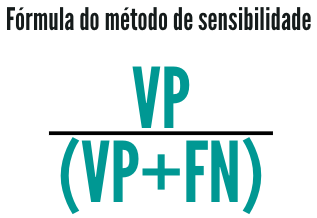

In [ ]:
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.967032967032967


###3.7.2.2. Método de especificidade


Essa métrica avalia a capacidade do método de detectar com sucesso resultados classificados como negativos. 

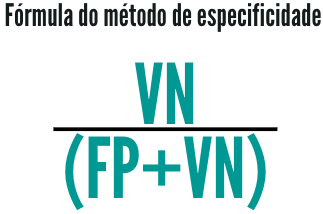

In [ ]:
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

1.0


###3.7.3. Curva ROC da Árvore de Decisão

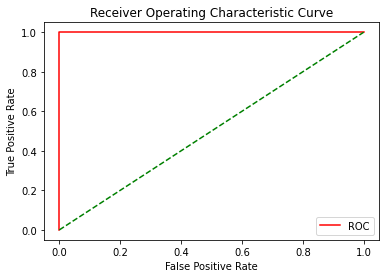

Random (chance) Prediction: AUROC = 1.000


In [ ]:
''' CURVA ROC da Árvore de Decisão '''

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

prob = dt.predict_proba(x_test)[::, 1]
fper, tper, thresholds = metrics.roc_curve(y_pred, prob)
plot_roc_curve(fper, tper)
auroc = float(format(metrics.roc_auc_score(y_pred, prob), '.8f'))
print('Random (chance) Prediction: AUROC = %.3f' % (auroc))



##3.8. KNN (K — Nearest Neighbors)

* **O que é KNN?**

KNN (K — Nearest Neighbors ou Vizinhos mais próximos) é um algoritmo de aprendizado supervisionado que classifica baseando-se no quão parecido é um dado (vetor) do outro.

* **Como funciona?**

Imagine que temos um valor X o qual queremos predizer, entre um grupo de duas classes. Primeiro iremos identificar os pontos mais próximo e depois qual a label que o identifica. Após isso será possível predizer a que classe o ponto X faz parte.

Para identificar de fato a que grupo o ponto X faz parte, será feito uma avaliação dos dados. As métricas para o cálculo da distância serão Distância Euclidiana, Distância de Hamming, Distância Manhattan e Distância de Markowski.A partir do calculos teremos a distância existente entre X e os pontos do meu dataset e, assim, conseguiremos saber qual a classe ele é mais similar.

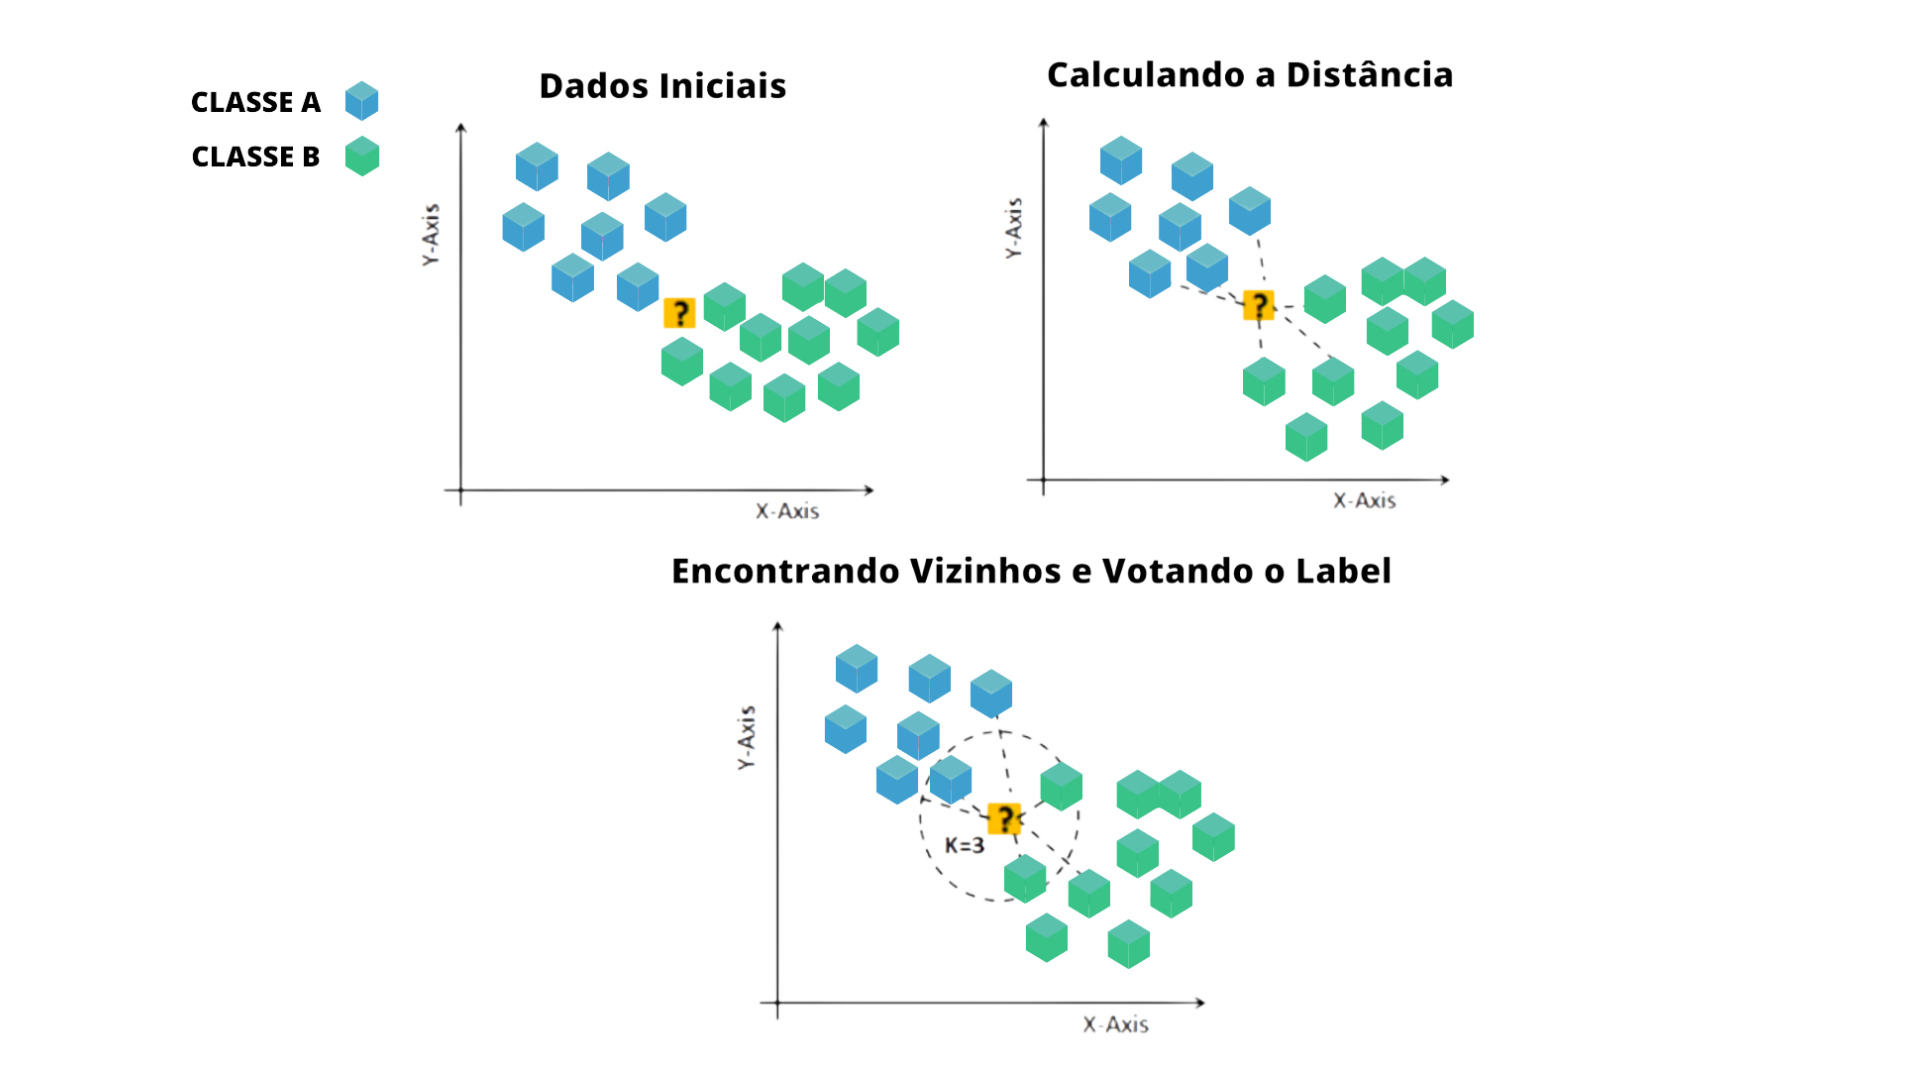

*Fonte da imagem: Autoria Própria*

In [ ]:
# Instaciação do Algoritmo
knn = KNeighborsClassifier(n_neighbors=7)
# Treino do modelo
knn.fit( x_train, y_train.squeeze() )

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# Calculando a acuracidade do treino e do teste
print('Acuracidade (treino): ', knn.score( x_train, y_train ))
print('Acuracidade (teste): ', knn.score( x_test, y_test ))

Acuracidade (treino):  0.8072289156626506
Acuracidade (teste):  0.7412587412587412


In [ ]:
# Previsões feitas pelo modelo com os dados teste
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [ ]:
# Probabilidade de cada classe
y_prob = knn.predict_proba(x_test)
y_prob

array([[1.        , 0.        ],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [0.57142857, 0.42857143],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [0.57142857, 0.42857143],
       [0.42857143, 0.57142857],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.85714286, 0.14285714],
       [0.28571429, 0.71428571],
       [0.28571429, 0.71428571],
       [1.        , 0.        ],
       [0.28571429, 0.71428571],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [0.57142857, 0.42857143],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.42857143, 0.57142857],
       [0.

In [ ]:
# Salvando o nosso treino em uma nova variavel para impedir possibilidade de sobreescrever
# Lembrando que o y verdadeiro para o conjunto de teste é o y_test 
y_true = y_test

###3.8.1. Matriz de Confusão - KNN

In [ ]:
#Criação da Matrix de Confussão
cm = confusion_matrix(y_true, y_pred)
cm

array([[71, 20],
       [17, 35]])

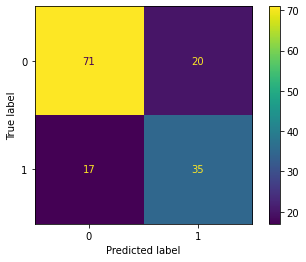

In [ ]:
# Visualização gráfica da Matriz de Confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

###3.8.2. Métricas - KNN

In [ ]:
# Métricas de avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        91
           1       0.93      1.00      0.96        52

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143



### 3.8.2.1. Método de sensibilidade

In [ ]:
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.9560439560439561


### 3.8.2.2. Método de especificidade 

In [ ]:
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

1.0


###3.8.3. Curva ROC do KNN

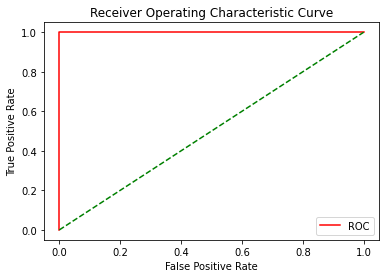

Random (chance) Prediction: AUROC = 1.000


In [ ]:
''' CURVA ROC do KNN '''

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()



prob = knn.predict_proba(x_test)[::, 1]
fper, tper, thresholds = metrics.roc_curve(y_pred, prob)
plot_roc_curve(fper, tper)
auroc = float(format(metrics.roc_auc_score(y_pred, prob), '.8f'))
print('Random (chance) Prediction: AUROC = %.3f' % (auroc))


##3.9. SVM (Support Vector Machine)

A definição do Support Vector Machine(SVM), pode ser dada por, um modelo que visa encontrar o hiperplano de separação ideal para os dados propostos, sendo o seu maior objetivo a maximização das distâncias das variáveis deixando-as o mais definida possível. Este tende a ser mais complexo que o KNN e apresentar resultados mais estruturados. 

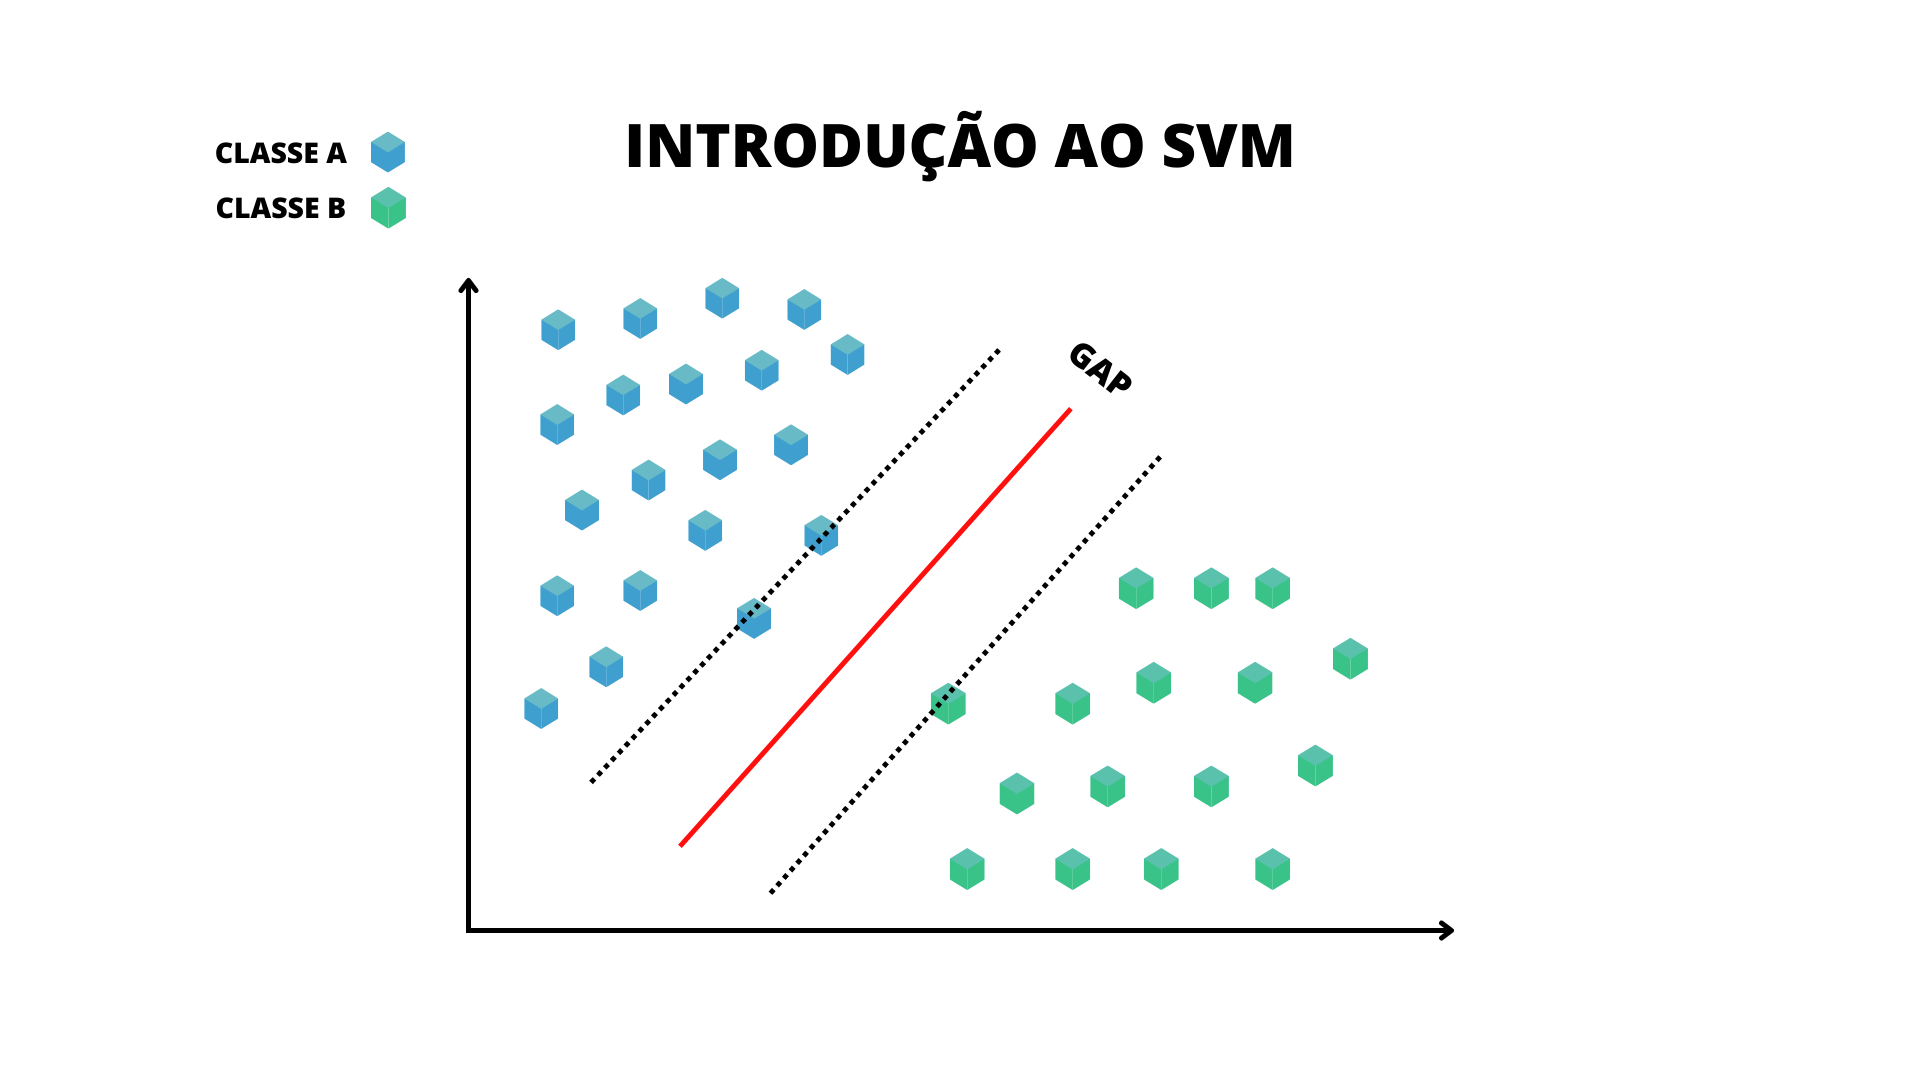

*Fonte da imagem: Autoria Própria*

Definição dos conjuntos de treino para a implementação do modelo.

In [ ]:
# Importanto e instanciando o Algoritmo
from sklearn.svm import SVC
clf = SVC()
# clf = svm.SVC()
clf.fit(x_train, y_train)

SVC()

Acurácia obtida dos dados separados para treino e teste do modelo, respectivamente.

In [ ]:
print('Acuracidade (treino): ', clf.score( x_train, y_train ))
print('Acuracidade (teste): ', clf.score( x_test, y_test ))

Acuracidade (treino):  0.6355421686746988
Acuracidade (teste):  0.6433566433566433


O código abaixo é responsável por exibir a tabela com os dados da variável algo, predizidos pelo modelo, conforme o conjunto de dados analisados.

In [ ]:
y_pred3 = clf.predict(x_test)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1])

###3.9.1. Matriz de Confusão - SVM

Pode-se definir matriz de confusão como, uma tabela que representa a frequência de classificação para as variáveis declaradas no modelo SVM, definido acima. 

Abaixo segue o código responsável por pegar os dados analisados e exibi-los na matriz.

In [ ]:
clf_matrix = confusion_matrix(y_true, y_pred3)
display(clf_matrix)

array([[59, 32],
       [19, 33]])

Para facilitar a visualização o código abaixo exibe a matriz de forma gráfica.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


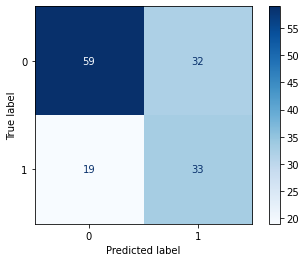

In [ ]:
plot_confusion_matrix(clf, x_test, y_test, cmap='Blues')


###3.9.2. Métricas - SVM

O código abaixo é responsável por exibir as principais métricas relacionada à o modelo SVM.

In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.76      0.65      0.70        91
           1       0.51      0.63      0.56        52

    accuracy                           0.64       143
   macro avg       0.63      0.64      0.63       143
weighted avg       0.67      0.64      0.65       143



### 3.9.2.1. Método de sensibilidade

In [ ]:
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = clf_matrix[0][0]/(clf_matrix[0][0]+clf_matrix[0][1])
print(sensibilidade)

0.6483516483516484


### 3.9.2.2 Método de Especificidade 

In [ ]:
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = clf_matrix[1][1]/(clf_matrix[1][0]+clf_matrix[1][1])
print(especificidade)

0.6346153846153846


###3.9.3. Curva ROC do SVM

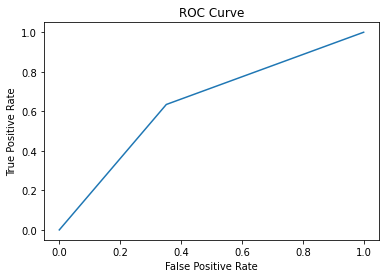

Area Under ROC Curve: 0.6414835164835164


In [ ]:
''' CURVA ROC do SVM '''

fpr1, tpr1, thresholds = metrics.roc_curve(y_true, y_pred3, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print('Area Under ROC Curve:', auc)


##3.10. Naive Bayes

O algoritmo “Naive Bayes” foi baseado no “Teorema de Bayes”, modelo criado pelo matemático inglê Thomas Bayes (1701 – 1761). Tal modelo realiza uma classificação probabilística de observações, caracterizando-as em classes pré-definidas. Dessa maneira, realiza a predição de um evento A acontecer dado a ocorrência que um evento B já aconteceu.

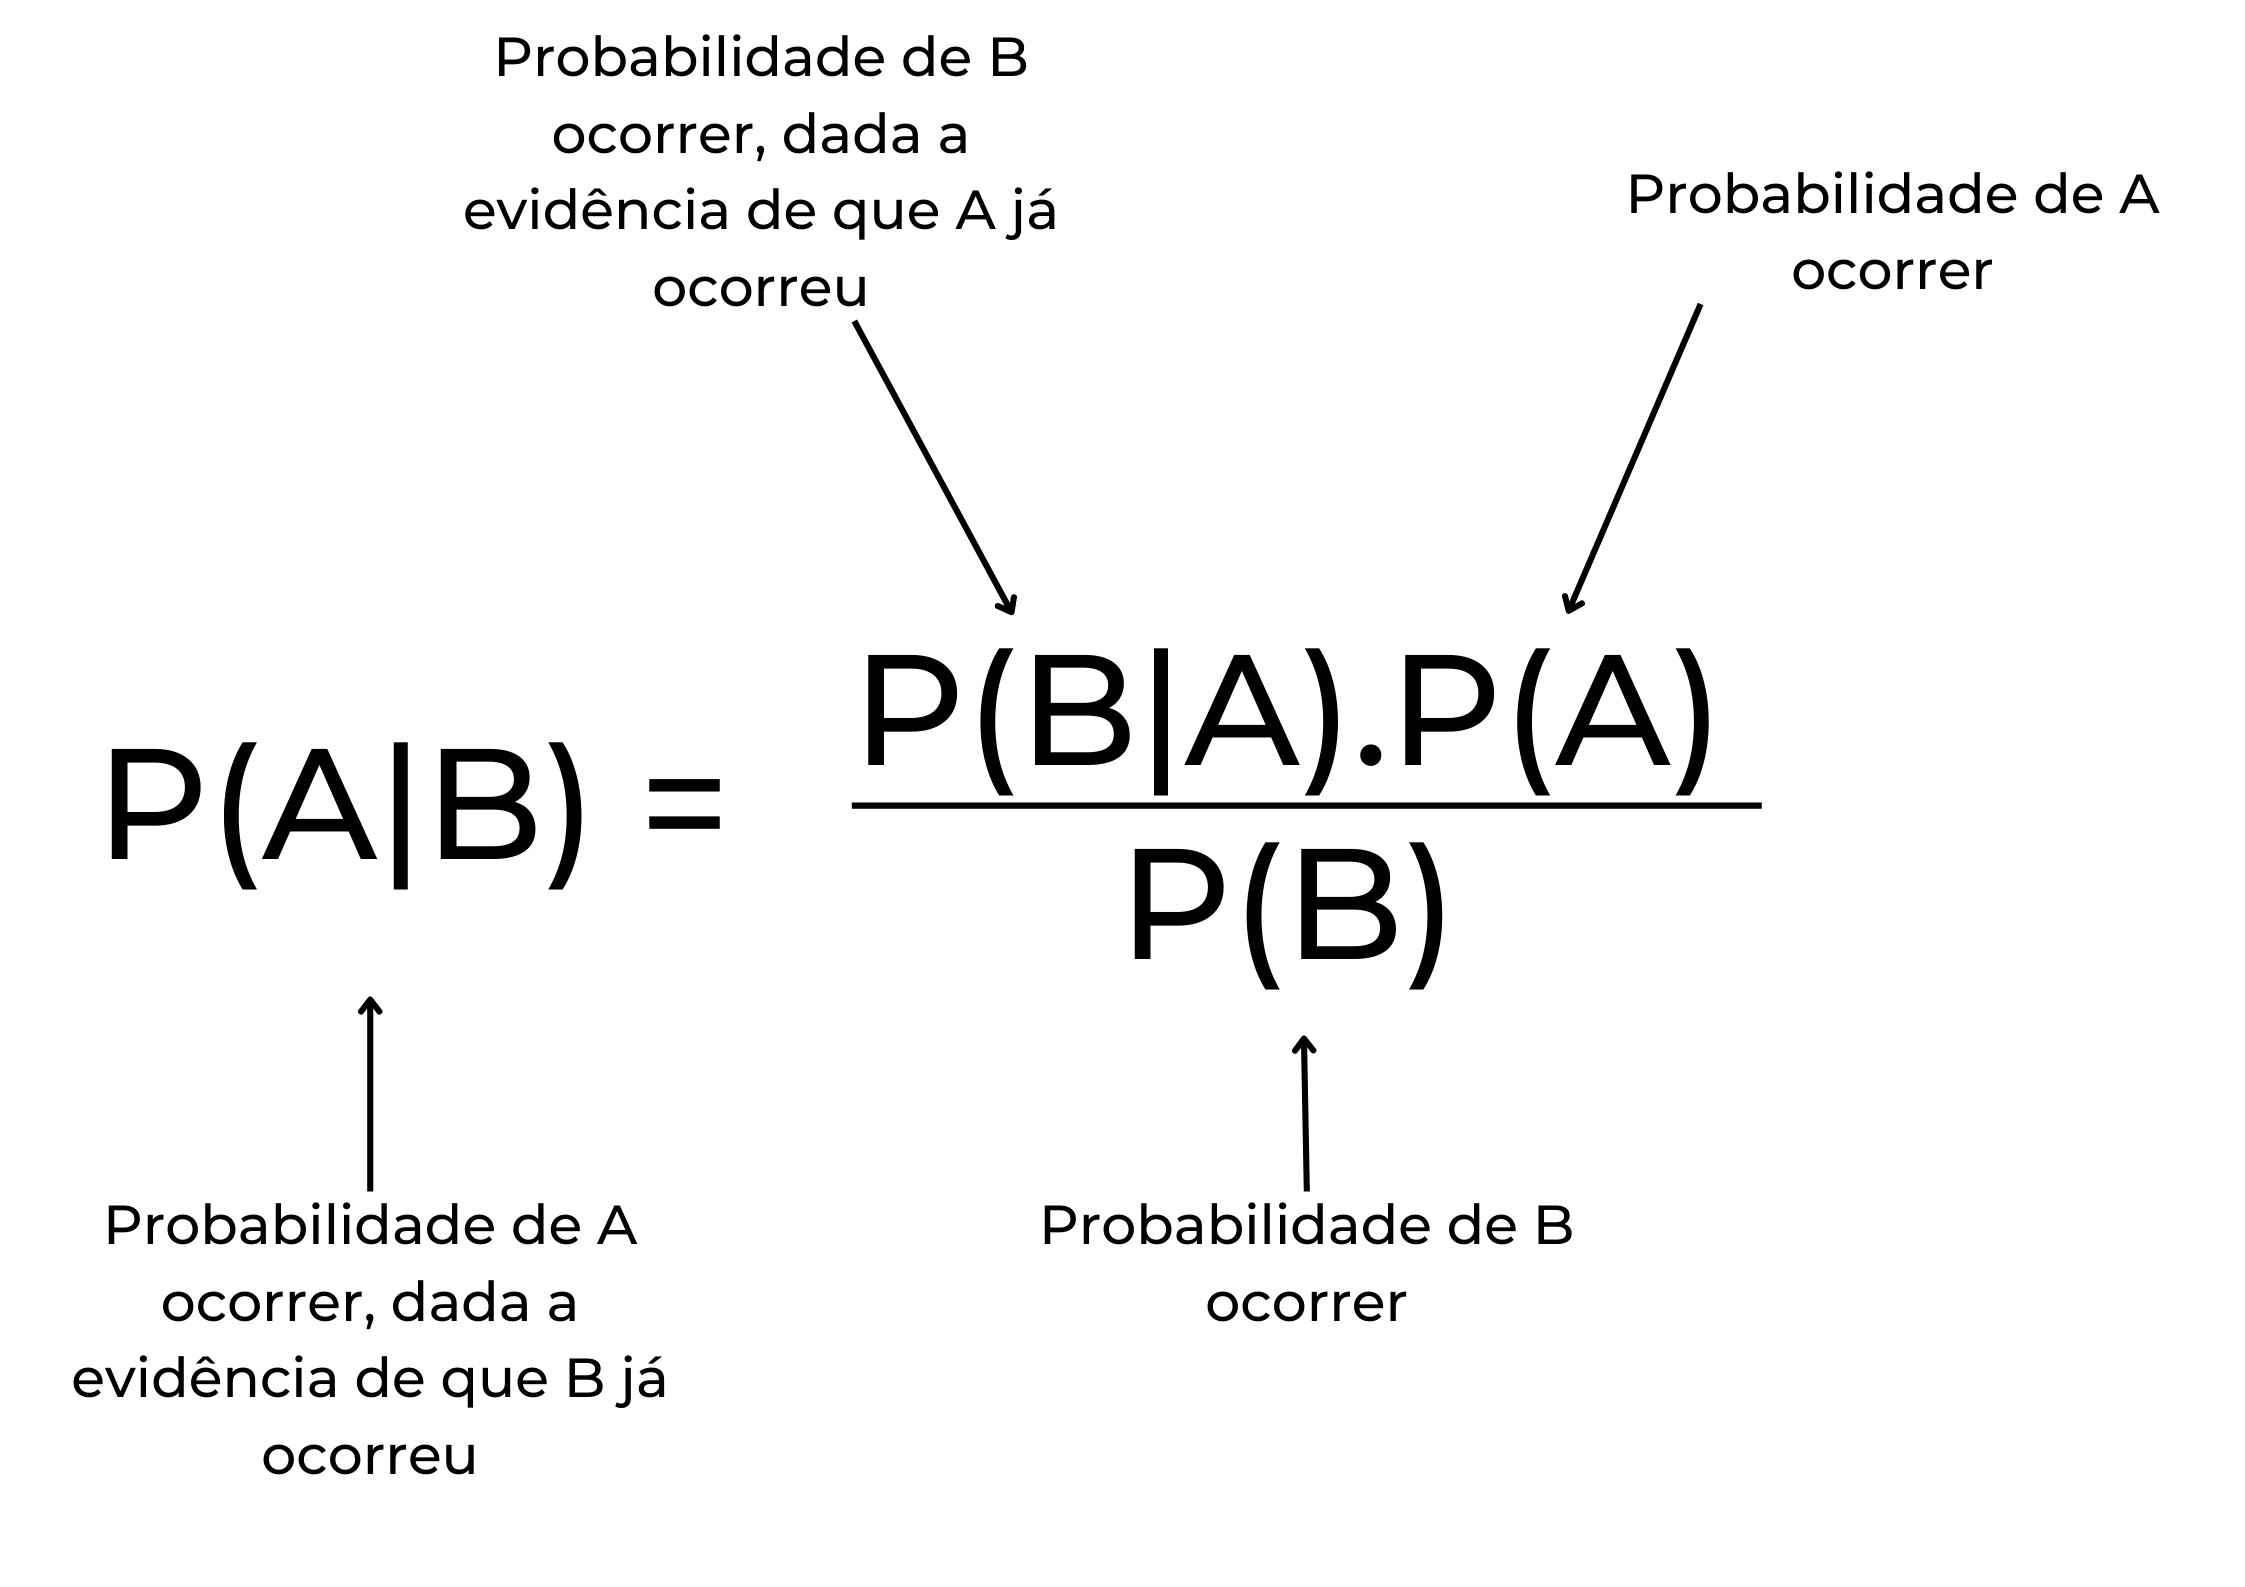

Fonte da imagem: Autoria Própria 

In [ ]:
# Importanto e instanciando o Algoritmo
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
# Treino do modelo
naive.fit(x_train, y_train.squeeze())

GaussianNB()

In [ ]:
# Calculando a acuracidade do treino e do teste
print('Acuracidade (treino): ', naive.score( x_train, y_train ))
print('Acuracidade (teste): ', naive.score( x_test, y_test ))

Acuracidade (treino):  0.7771084337349398
Acuracidade (teste):  0.6083916083916084


In [ ]:
# Previsões feitas pelo modelo com os dados de teste
y_pred = naive.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1])

###3.10.1. Matriz de Confusão - Naive Bayes

In [ ]:
#Criação da Matrix de Confussão
cm = confusion_matrix(y_true, y_pred)
cm

array([[44, 47],
       [ 9, 43]])

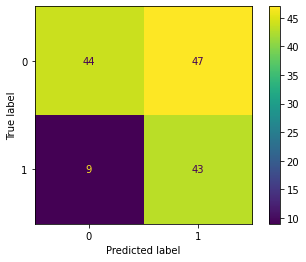

In [ ]:
# Visualização gráfica da Matrix de Confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

###3.10.2. Métricas - Naive Bayes

In [ ]:
# Métricas de avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.48      0.61        91
           1       0.48      0.83      0.61        52

    accuracy                           0.61       143
   macro avg       0.65      0.66      0.61       143
weighted avg       0.70      0.61      0.61       143



### 3.10.2.1. Método de sensibilidade

In [ ]:
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.4835164835164835


### 3.10.1.2. Método de especificidade

In [ ]:
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

0.8269230769230769


###3.10.3. Curva ROC Naive Bayes

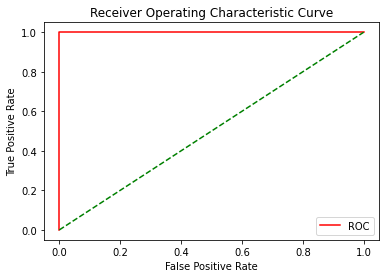

Random (chance) Prediction: AUROC = 1.000


In [ ]:
''' CURVA ROC do Naive Bayes '''

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()


prob = naive.predict_proba(x_test)[::, 1]
fper, tper, thresholds = metrics.roc_curve(y_pred, prob)
plot_roc_curve(fper, tper)
auroc = float(format(metrics.roc_auc_score(y_pred, prob), '.8f'))
print('Random (chance) Prediction: AUROC = %.3f' % (auroc))

##3.11. Regressão Logística

A regressão logística é análoga a regressão linear, porém o resultado é dado de forma binária.Este método conhecido em estatística é usado para prever a probabilidade de um resultado e é popular especialmente por tarefas de classificação. O algoritmo prevê a probabilidade de ocorrência de um evento ajustando dados para uma função logística.

Exemplo de Regressão Logística

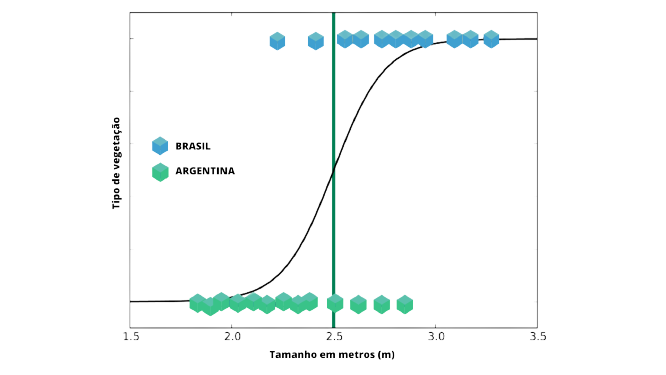

*Fonte da imagem: Autoria Própria*

In [ ]:
# Importando a Biblioteca 
from sklearn.linear_model import LogisticRegression

# Instanciando o algoritmo
lg = LogisticRegression(max_iter=1000)

# Treinando o modelo
model = lg.fit(x_train, y_train)

# Fazendo as predições
y_pred = model.predict(x_test)

In [ ]:
# Predições realizadas
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
# Calculando a acuracidade do treino e do teste
print('Acuracidade (treino): ', model.score( x_train, y_train ))
print('Acuracidade (teste): ', model.score( x_test, y_test ))

Acuracidade (treino):  0.9849397590361446
Acuracidade (teste):  0.972027972027972


###3.11.1. Matriz de Confusão - Regressão Logística

In [ ]:
# Criação da Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[87,  4],
       [ 0, 52]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


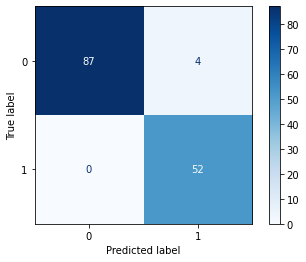

In [ ]:
# Visualização gráfica da Matrix de Confusão
cm = plot_confusion_matrix(model, x_test, y_test, cmap = 'Blues', values_format='.0f') #normalize = 'true')

###3.11.2. Métricas - Regressão Logística

In [ ]:
# Métricas de avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        91
           1       0.93      1.00      0.96        52

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143



### 3.11.2.1. Método de sensibilidade

In [ ]:
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.9560439560439561


### 3.11.2.2. Método de especificidade

In [ ]:
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

1.0


###3.11.3. Curva ROC da Regressão Logística

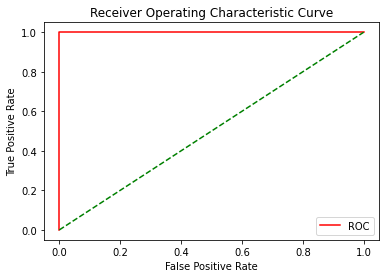

Random (chance) Prediction: AUROC = 1.000


In [ ]:
''' CURVA ROC da Regressão Logística '''

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()


prob = lg.predict_proba(x_test)[::, 1]
fper, tper, thresholds = metrics.roc_curve(y_pred, prob)
plot_roc_curve(fper, tper)
auroc = float(format(metrics.roc_auc_score(y_pred, prob), '.8f'))
print('Random (chance) Prediction: AUROC = %.3f' % (auroc))

#4. Avaliação do modelo

A partir da análise das métricas obtidas de cada modelo, pode-se inferir que o modelo ao qual apresentou um resultado mais satisfatório com os dados testados até o momento é o algoritmo de Árvore de Decisão. Por apresentar 100% de acurácia tanto no modelo de teste como de treino,  pela base de dados trabalhada ser consideravelmente pequena, é possível o modelo acertar totalmente a saída, entretanto não é comum. Pretende-se posteriormente identificar o fator decisivo para este resultado e qual o protocolo a seguir quando acontece tal retorno.


# 5. Hiperparâmetros

Os Hiperparâmetros foram usados para melhorar o aprendizado de máquina. O objetivo de sua utilização é analisar, através do teste de novos parâmetros, se é possível melhorar os algoritmos manipulados. Os algoritmos de pesquisa dos hiperparâmetros foram o "Grid Search" e o "Random Search". No primeiro a busca acontece em grade simples e testa todas as combinações dentro dessa vizinhança, já no segundo é feita uma busca aleatória e testa combinações apenas algumas combinações de hiperparâmetros.

Ilustração do funcionamento dos modelos citados:

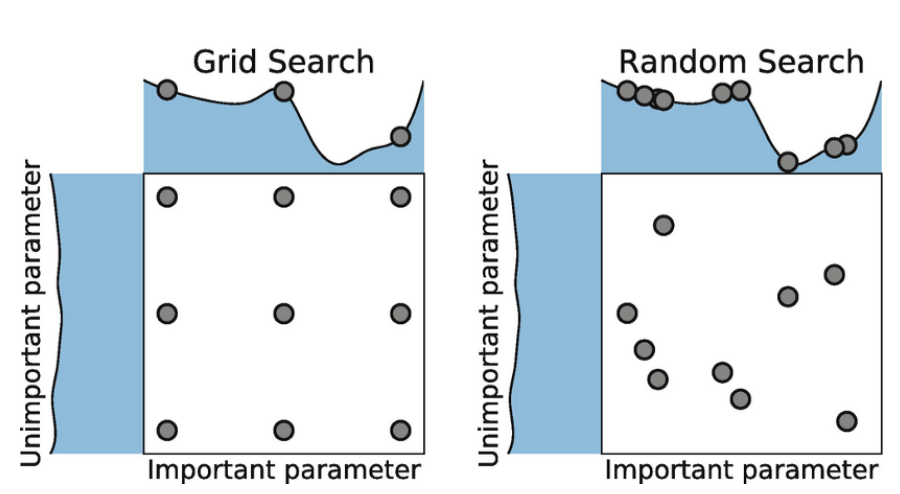

Fonte: [Medium](https://medium.com/turing-talks/modelos-de-predi%C3%A7%C3%A3o-otimiza%C3%A7%C3%A3o-de-hiperpar%C3%A2metros-em-python-3436fc55016e)

##5.1. Árvore de Decisão

###5.1.1. GridSearch - Árvore de Decisão

In [ ]:
# Definição do espaço possível dos hiperparâmetros a serem testados
parametros = {
  "criterion":['gini','entropy'],
  "max_depth":range(1,10),
  "min_samples_split":range(1,10),
  "min_samples_leaf":range(1,5)}

# Teste do modelo com os hiperparâmetros definidos
grid_search_DecisionTree = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search_DecisionTree.fit(x_train, y_train.squeeze())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(grid_search_DecisionTree.best_score_)
print(grid_search_DecisionTree.best_params_)

0.9818181818181818
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [ ]:
# Armazenando o melhor estimador em uma variavel
DecisionTree_best = grid_search_DecisionTree.best_estimator_
DecisionTree_best

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=3)

In [ ]:
# Avaliação dos hiperparâmetros sob diferentes metricas
y_pred = DecisionTree_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        91
           1       0.91      1.00      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# Verificação da sensibilidade
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.945054945054945


In [ ]:
# Verificação da especificidade
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

1.0


###5.1.2. Random Search - Árvore de Decisão

In [ ]:
# Importação da Biblioteca
from sklearn.model_selection import RandomizedSearchCV

# Definição do espaço possível dos hiperparâmetros a serem testados
parameters = {"criterion":['gini','entropy'],
  "max_depth":range(1,10),
  "min_samples_split":range(1,10),
  "min_samples_leaf":range(1,5)}
  
# Teste do modelo com os hiperparâmetros definidos
random_search = RandomizedSearchCV(estimator = DecisionTreeClassifier(), param_distributions=parameters)
random_search.fit(x_train, y_train.squeeze())


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 10),
                                        'min_samples_leaf': range(1, 5),
                                        'min_samples_split': range(1, 10)})

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(random_search.best_score_)
print(random_search.best_params_)

0.9787878787878789
{'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 6, 'criterion': 'entropy'}


In [ ]:
# Armazenando o melhor estimador em uma variavel
ad_best = random_search.best_estimator_
ad_best

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3)

In [ ]:
# Avaliação dos hiperparâmetros sob diferentes metricas
y_pred = ad_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        91
           1       0.91      1.00      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# Verificação da sensibilidade
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.945054945054945


In [ ]:
# Verificação da especificidade
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

1.0


##5.2. KNN

###5.2.1. GridSearch - KNN

In [ ]:
# Definição do espaço possível dos hiperparâmetros a serem testados
parametros = {'n_neighbors': [3, 5, 7, 9, 13, 17, 21, 29],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [5, 10, 15, 30, 45, 60]}

# Teste do modelo com os hiperparâmetros definidos
grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parametros)
grid_search_knn.fit(x_train, y_train.squeeze())

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15, 30, 45, 60],
                         'n_neighbors': [3, 5, 7, 9, 13, 17, 21, 29],
                         'weights': ['uniform', 'distance']})

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(grid_search_knn.best_score_)
print(grid_search_knn.best_params_)

0.7470827679782903
{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Armazenando o melhor estimador em uma variavel
knn_best = grid_search_knn.best_estimator_
knn_best

KNeighborsClassifier(leaf_size=5, n_neighbors=3, weights='distance')

In [ ]:
# Avaliação dos hiperparâmetros sob diferentes metricas
y_pred = knn_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        91
           1       0.75      0.73      0.74        52

    accuracy                           0.81       143
   macro avg       0.80      0.79      0.80       143
weighted avg       0.81      0.81      0.81       143



In [ ]:
# Verificação da sensibilidade
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.8571428571428571


In [ ]:
# Verificação da especificidade
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

0.7307692307692307


###5.2.2. Random Search - KNN


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Definição do espaço possível dos hiperparâmetros a serem testados
parametros = {'n_neighbors': [3, 5, 7, 9, 13, 17, 21, 29],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [5, 10, 15, 30, 45, 60]}

# Teste do modelo com os hiperparâmetros definidos
random_search = RandomizedSearchCV(estimator = KNeighborsClassifier(), param_distributions=parametros)
random_search.fit(x_train, y_train.squeeze())


RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [5, 10, 15, 30, 45, 60],
                                        'n_neighbors': [3, 5, 7, 9, 13, 17, 21,
                                                        29],
                                        'weights': ['uniform', 'distance']})

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(random_search.best_score_)
print(random_search.best_params_)


0.731659882406151
{'weights': 'distance', 'n_neighbors': 5, 'leaf_size': 45, 'algorithm': 'brute'}


In [ ]:
# Armazenando o melhor estimador em uma variavel
knn_best = random_search.best_estimator_
knn_best

KNeighborsClassifier(algorithm='brute', leaf_size=45, weights='distance')

In [ ]:
# Avaliação dos Hiperparâmetros sob diferentes metricas, sendo elas acurácia do treino, acurácia do teste, revocação de teste, precisão de teste e f1 de teste

y_pred = knn_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        91
           1       0.71      0.77      0.74        52

    accuracy                           0.80       143
   macro avg       0.79      0.80      0.79       143
weighted avg       0.81      0.80      0.81       143



In [ ]:
# Verificação da sensibilidade
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.8241758241758241


In [ ]:
# Verificação da especificidade
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

0.7692307692307693


##5.3. Naive Bayes

###5.3.1. Grid Search - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Definição do espaço possível dos hiperparâmetros a serem testados
parametros = {'var_smoothing': [1.0, 0.00009, 0.0000009]}

# Teste do modelo com os hiperparâmetros definidos
grid_search_bayes = GridSearchCV(estimator = GaussianNB(), param_grid=parametros)
grid_search_bayes.fit(x_train, y_train.squeeze())

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1.0, 9e-05, 9e-07]})

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(grid_search_bayes.best_score_)
print(grid_search_bayes.best_params_)

0.9153324287652647
{'var_smoothing': 9e-07}


In [ ]:
# Armazenando o melhor estimador em uma variavel
bayes_best = grid_search_bayes.best_estimator_
bayes_best

GaussianNB(var_smoothing=9e-07)

In [ ]:
# Avaliação dos Hiperparâmetros sob diferentes metricas, sendo elas acurácia do treino, acurácia do teste, revocação de teste, precisão de teste e f1 de teste
y_pred = bayes_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        91
           1       0.85      0.98      0.91        52

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



In [ ]:
# Verificação da sensibilidade
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.9010989010989011


In [ ]:
# Verificação da especificidade
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

0.9807692307692307


###5.3.2. Random Search - Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Definição do espaço possível dos hiperparâmetros a serem testados
parametros = {'var_smoothing': [1.0, 0.00009, 0.0000009, 1]}

# Teste do modelo com os hiperparâmetros definidos
random_search_bayes = RandomizedSearchCV(estimator = GaussianNB(), param_distributions=parametros)
random_search_bayes.fit(x_train, y_train.squeeze())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(estimator=GaussianNB(),
                   param_distributions={'var_smoothing': [1.0, 9e-05, 9e-07,
                                                          1]})

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(random_search_bayes.best_score_)
print(random_search_bayes.best_params_)

0.9153324287652647
{'var_smoothing': 9e-07}


In [ ]:
# Armazenando o melhor estimador em uma variavel
bayes_best_random = random_search_bayes.best_estimator_
bayes_best_random

GaussianNB(var_smoothing=9e-07)

In [ ]:
# Avaliação dos Hiperparâmetros sob diferentes metricas, sendo elas acurácia do treino, acurácia do teste, revocação de teste, precisão de teste e f1 de teste
y_pred = bayes_best_random.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        91
           1       0.85      0.98      0.91        52

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



In [ ]:
# Verificação da sensibilidade
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.9010989010989011


In [ ]:
# Verificação da especificidade
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

0.9807692307692307


##5.4. SVM


###5.4.1. GridSearch - SVM

In [ ]:
# Importação da biblioteca
from sklearn.svm import SVC

# Definição do espaço possível dos hiperparâmetros a serem testados
parameters = {'C':[1.0, 1.5, 0.5],
              'kernel' : ['linear', 'poly'],
              'gamma' : ['scale', 'auto']}

# Teste do modelo com os hiperparâmetros definidos
grid_search_svm = GridSearchCV(estimator = svm.SVC(), param_grid=parameters)
grid_search_svm.fit(x_train, y_train.squeeze())

KeyboardInterrupt: ignored

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(grid_search_svm.best_score_)
print(grid_search_svm.best_params_)

In [ ]:
# Armazenando o melhor estimador em uma variavel
SVM_best = grid_search_svm.best_estimator_
SVM_best

In [ ]:
# Avaliação dos Hiperparâmetros sob diferentes metricas
y_pred = SVM_best.predict(x_test)
print(classification_report(y_test, y_pred))

###5.4.2. Random Search - SVM


In [ ]:
# Definição do espaço possível dos hiperparâmetros a serem testados
parameters = {'C':[1.0, 1.5, 0.5],
              'kernel' : ['linear', 'poly'],
              'gamma' : ['scale', 'auto']}

# Teste do modelo com os hiperparâmetros definidos
random_search = RandomizedSearchCV(estimator = svm.SVC(), param_distributions=parameters)
random_search.fit(x_train, y_train.squeeze())

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(random_search.best_score_)
print(random_search.best_params_)

In [ ]:
# Armazenando o melhor estimador em uma variavel
svm_best = random_search.best_estimator_
svm_best

In [ ]:
# Avaliação dos Hiperparâmetros sob diferentes metricas
y_pred = svm_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

In [ ]:
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

In [ ]:
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

##5.5. Regressão Logística

###5.5.1. GridSearch - Regressão Logística


In [ ]:
# Importação da biblioteca
from sklearn.model_selection import GridSearchCV

# Definição do espaço possível dos hiperparâmetros a serem testados
parametros = {'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 100],
              'penalty':['l1', 'l2']
             }

# Teste do modelo com os hiperparâmetros definidos
grid_search_rl = GridSearchCV(estimator = LogisticRegression(max_iter=1000), param_grid = parametros)
grid_search_rl.fit(x_train, y_train.squeeze())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following

GridSearchCV(estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(grid_search_rl.best_score_)
print(grid_search_rl.best_params_)

0.9637268204432383
{'C': 0.3, 'penalty': 'l2'}


In [ ]:
# Armazenando o melhor estimador em uma variavel
RL_best = grid_search_rl.best_estimator_
RL_best

LogisticRegression(C=0.3, max_iter=1000)

In [ ]:
# Avaliação dos Hiperparâmetros sob diferentes metricas
y_pred = RL_best.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        91
           1       0.91      1.00      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.945054945054945


In [ ]:
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

1.0


###5.5.2. RandomSearch - Regressão Logística

In [ ]:
# Importação da biblioteca
from sklearn.model_selection import RandomizedSearchCV

# Definição do espaço possível dos hiperparâmetros a serem testados
parametros = {'C':[0.1, 0.3, 0.5, 0.7, 0.9, 1, 10, 100],
              'penalty':['l1', 'l2']
             }

# Teste do modelo com os hiperparâmetros definidos
random_search_rl = RandomizedSearchCV(estimator = LogisticRegression(), param_distributions=parametros)
random_search_rl.fit(x_train, y_train.squeeze())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RandomizedSearchCV(estimator=LogisticRegression(),
                   param_distributions={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1, 10,
                                              100],
                                        'penalty': ['l1', 'l2']})

In [ ]:
# Verificação do melhor score e dos melhores parâmetros
print(random_search_rl.best_score_)
print(random_search_rl.best_params_)

0.9637268204432383
{'penalty': 'l2', 'C': 0.5}


In [ ]:
# Armazenando o melhor estimador em uma variavel
rl_best = random_search_rl.best_estimator_
rl_best

LogisticRegression(C=0.5)

In [ ]:
# Avaliação dos Hiperparâmetros sob diferentes metricas, sendo elas, acurácia do treino, acurácia do teste, revocação de teste, precisão de teste e f1 de teste
y_pred = rl_best.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        91
           1       0.91      1.00      0.95        52

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
# A sensibilidade é igual aos verdadeiros positivos (VP) dividido pela soma dos verdadeiros positivos (VP) com os falsos negativos (FN)
sensibilidade = cm[0][0]/(cm[0][0]+cm[0][1])
print(sensibilidade)

0.945054945054945


In [ ]:
# A especificidade é igual aos verdadeiros negativos (VN) dividido pela soma dos verdadeiros negativos (VN) com os falsos positivos (FP)
especificidade = cm[1][1]/(cm[1][0]+cm[1][1])
print(especificidade)

1.0


#6. Estabilidade dos dados em relação a separação de conjunto de treinamento e teste

##6.1. Árvore de decisão

In [ ]:
#função para chamar a Árvore de Decisão, apresentada anteriormente
def func_arvore(i):
  #print do nome do algoritimo, para indicar a qual algoritimo a avaliação pertence
  print('Árvore')
  #print da seed utilizada
  print(i)
  y_train.squeeze()
  dt = DecisionTreeClassifier()
  dt.fit(x_train, y_train.squeeze())
  y_pred = dt.predict(x_test)
  #avaliação da seed sob diferentes metricas
  print(classification_report(y_test, y_pred))

##6.2. KNN

In [ ]:
#função para chamar O kNN, apresentado anteriormente
def func_knn(i):
  #print do nome do algoritimo, para indicar a qual algoritimo a avaliação pertence
  print('KNN')
  #print da seed utilizada
  print(i)
  knn = KNeighborsClassifier(n_neighbors=7)
  knn.fit( x_train, y_train.squeeze() )
  y_pred = knn.predict(x_test)
  #avaliação da seed sob diferentes metricas
  print(classification_report(y_test, y_pred))

##6.3. SVM

In [ ]:
#função para chamar O kNN, apresentado anteriormente
def func_Svm(i):
  #print do nome do algoritimo, para indicar a qual algoritimo a avaliação pertence
  print('SVM')
  #print da seed utilizada
  print(i)
  clf = SVC()
  clf.fit(x_train, y_train)
  y_pred3 = clf.predict(x_test)
  #avaliação da seed sob diferentes metricas
  print(classification_report(y_test, y_pred3))

##6.4. Naive Bayes

In [ ]:
#função para chamar O Naive Bayes, apresentado anteriormente
def func_naive(i):
  #print do nome do algoritimo, para indicar a qual algoritimo a avaliação pertence
  print('Naive Bayes')
  #print da seed utilizada
  print(i)
  naive = GaussianNB()
  naive.fit(x_train, y_train.squeeze())
  y_pred = naive.predict(x_test)
  #avaliação da seed sob diferentes metricas
  print(classification_report(y_test, y_pred))

##6.5. Regressão Logística

In [ ]:
#função para chamar O Naive Bayes, apresentado anteriormente
def func_Regres(i):
  #print do nome do algoritimo, para indicar a qual algoritimo a avaliação pertence
  print('Regressão Logística')
  #print da seed utilizada
  print(i)
  lg = LogisticRegression()
  model = lg.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  #avaliação da seed sob diferentes metricas
  print(classification_report(y_test, y_pred))

In [ ]:
#função para charmar todos os algoritimos com diferentes seeds
#o for passa por todas as seeds especeficificadas no intervalo (x,x)
for i in range(42,50):
  random_state = i
  func_arvore(i)
  func_knn(i)
  func_Svm(i)
  func_naive(i)
  func_Regres(i)

#7. Referências

BÔSCOA, Vinícius. Codificação de Variáveis - Label vs One-Hot Encoder. [S. l.], 17 maio 2022. Disponível em: https://www.viniboscoa.dev/blog/codificacao-de-variaveis-label-vs-one-hot-encoder. Acesso em: 26 ago. 2022.

HORN, Michelle. Python replace: substituindo substrings em uma string!. [S. l.], 31 ago. 2021. Disponível em: https://blog.betrybe.com/python/python-replace/#1. Acesso em: 26 ago. 2022.

MOURA, Weslley. One Hot Encoding com Python. [S. l.], 12 dez. 2016. Disponível em: https://hackinganalytics.wordpress.com/2016/12/12/one-hot-encoding-com-python/. Acesso em: 26 ago. 2022.

Data Frame. O que é data frame?. Disponível em: https://www.dcc.fc.up.pt/~ltorgo/SebentaR/HTML/node16.html. Acesso em: 26 ago. 2022.